# Projet recommandation ML

Ce projet vise à prédire les notes de films en utilisant diverses méthodes de recommandation, avec une évaluation des performances des modèles.

In [37]:
import numpy as np

## Chargement des données


- `ratings_train.npy` : Matrice des notes d'entraînement des utilisateurs sur les produits.
- `ratings_test.npy` : Matrice des notes de test des utilisateurs sur les produits.
- `namegenres.npy` : Liste des films avec les genres associés.
- `list_index_wanted.npy` : Liste des indices pour lesquels les notes doivent être prédictes.



In [38]:
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')


## Aperçu des données

Pour mieux comprendre la structure de nos données nous affichons les cinq premières lignes de chaque fichier pour vérifier la qualité des données et s'assurer que chaque matrice est correctement chargée.


In [39]:
# Afficher un aperçu des données
print("Aperçu de ratings_train:", ratings_train[:5])  # Affiche les 5 premières lignes
print("Aperçu de ratings_test:", ratings_test[:5])    # Affiche les 5 premières lignes
print("Aperçu de namegenres:", namegenres[:5])        # Affiche les 5 premières lignes
print("Aperçu de list_index_wanted:", list_index_wanted[:5])  # Affiche les 5 premières lignes


Aperçu de ratings_train: [[ 4. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Aperçu de ratings_test: [[nan nan  4. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 4. nan nan ... nan nan nan]]
Aperçu de namegenres: [['Toy Story (1995)' 'Adventure|Animation|Children|Comedy|Fantasy']
 ['Jumanji (1995)' 'Adventure|Children|Fantasy']
 ['Grumpier Old Men (1995)' 'Comedy|Romance']
 ['Waiting to Exhale (1995)' 'Comedy|Drama|Romance']
 ['Father of the Bride Part II (1995)' 'Comedy']]
Aperçu de list_index_wanted: [[  0  42]
 [  0 237]
 [  0 250]
 [  0 261]
 [  0 265]]


In [40]:
print("Dimensions de ratings_train:", ratings_train.shape)
print("Dimensions de ratings_test:", ratings_test.shape)
print("Dimensions de namegenres:", namegenres.shape)
print("Dimensions de list_index_wanted:", list_index_wanted.shape)


Dimensions de ratings_train: (610, 4980)
Dimensions de ratings_test: (610, 4980)
Dimensions de namegenres: (4980, 2)
Dimensions de list_index_wanted: (31598, 2)


In [41]:
# Compter le nombre de notes non-nulles dans chaque dataset
ratings_train_count = np.count_nonzero(~np.isnan(ratings_train))
ratings_test_count = np.count_nonzero(~np.isnan(ratings_test))

print(f"Nombre de notes dans ratings_train : {ratings_train_count}")
print(f"Nombre de notes dans ratings_test : {ratings_test_count}")


Nombre de notes dans ratings_train : 31598
Nombre de notes dans ratings_test : 31598


## Analyse des valeurs manquantes

La matrice d'entraînement econtient de nombreuses valeurs manquantes (`NaN`). Le calcul du pourcentage de valeurs manquantes nous donne une estimation de la densité des données disponibles pour l'entraînement du modèle.


In [42]:
import numpy as np

def analyze_data(ratings_train, ratings_test, namegenres):
    # Afficher les formes des matrices
    print("Forme de la matrice d'entraînement:", ratings_train.shape)
    print("Forme de la matrice de test:", ratings_test.shape)
    print("Nombre de films et leurs genres:", namegenres.shape)

    # Calcul du pourcentage de valeurs manquantes dans la matrice d'entraînement
    total_elements = ratings_train.size
    missing_elements = np.isnan(ratings_train).sum()
    missing_percentage = (missing_elements / total_elements) * 100
    print(f"\nPourcentage de valeurs manquantes dans train: {missing_percentage:.2f}%")

In [43]:
# Calculer le taux de valeurs manquantes dans la matrice de notation
num_missing = np.isnan(ratings_train).sum()
total_values = ratings_train.size
missing_rate = (num_missing / total_values) * 100

print(f"Taux de valeurs manquantes dans ratings_train: {missing_rate:.2f}%")


Taux de valeurs manquantes dans ratings_train: 98.96%


## Visualisation de la distribution des notes

Pour analyser la distribution des notes dans les jeux de données d'entraînement et de test, nous avons remplacé les valeurs manquantes (`NaN`) par 0, puis filtré les notes non nulles pour afficher uniquement les notes valides. 

Les graphiques ci-dessous montrent la fréquence de chaque note compris entre 0 et 5 pour les deux jeux de données ce qui permet de mieux comprendre comment les utilisateurs évaluent les films et de vérifier si la distribution des notes est similaire dans les jeux d'entraînement et de test.

Nous remarquons que les notes les plus fréquentes dans les deux ensembles sont les notes élevées, particulièrement autour de 4 et 5. La similitude entre les distributions des jeux d'entraînement et de test indique que les deux ensembles de données sont cohérents.


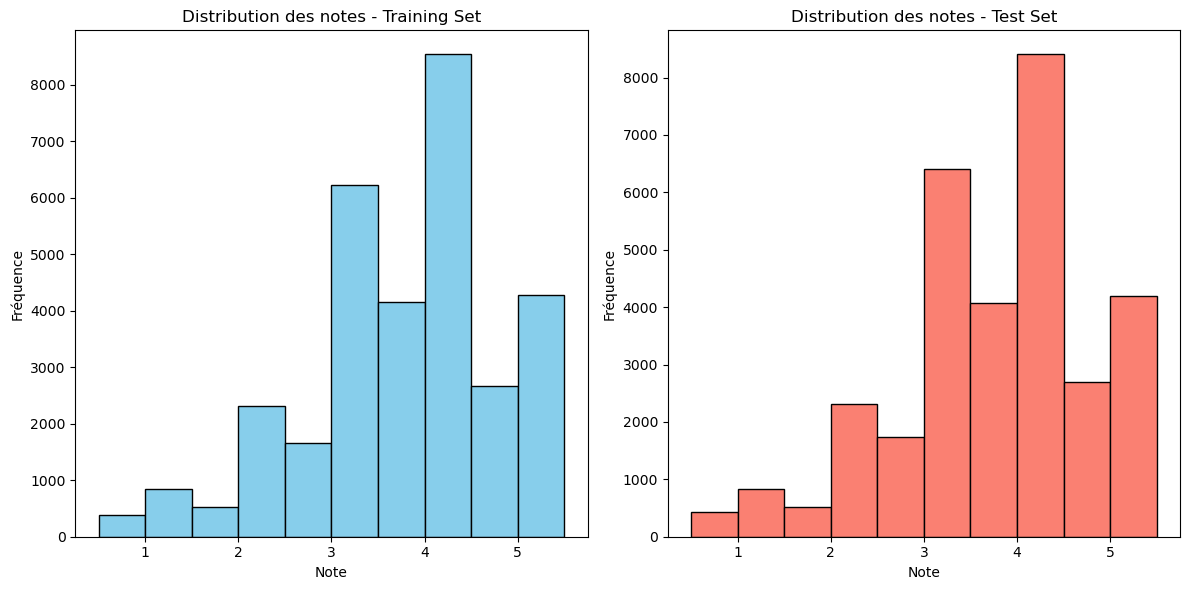

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Remplacer les NaN par 0 pour faciliter la visualisation
ratings_train_non_nan = np.nan_to_num(ratings_train, nan=0).flatten()
ratings_test_non_nan = np.nan_to_num(ratings_test, nan=0).flatten()

# Filtrer les notes supérieures à 0 (supposant que 0 signifie absence de note)
ratings_train_non_nan = ratings_train_non_nan[ratings_train_non_nan > 0]
ratings_test_non_nan = ratings_test_non_nan[ratings_test_non_nan > 0]

# Créer l'histogramme
plt.figure(figsize=(12, 6))

# Histogramme pour ratings_train
plt.subplot(1, 2, 1)
plt.hist(ratings_train_non_nan, bins=np.arange(0.5, 6, 0.5), color='skyblue', edgecolor='black')
plt.title("Distribution des notes - Training Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

# Histogramme pour ratings_test
plt.subplot(1, 2, 2)
plt.hist(ratings_test_non_nan, bins=np.arange(0.5, 6, 0.5), color='salmon', edgecolor='black')
plt.title("Distribution des notes - Test Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


## Distribution du nombre de notes par utilisateur

Ce graphique montre la répartition du nombre de notes par chaque utilisateur dans le jeu d'entraînement. 

### Conclusion sur la distribution du nombre de notes

La majorité des utilisateurs ont évalué très peu de produits comme le montre le pic élevé à gauche du graphique. Cela indique que beaucoup d'utilisateurs sont peu actifs pour les notes. 


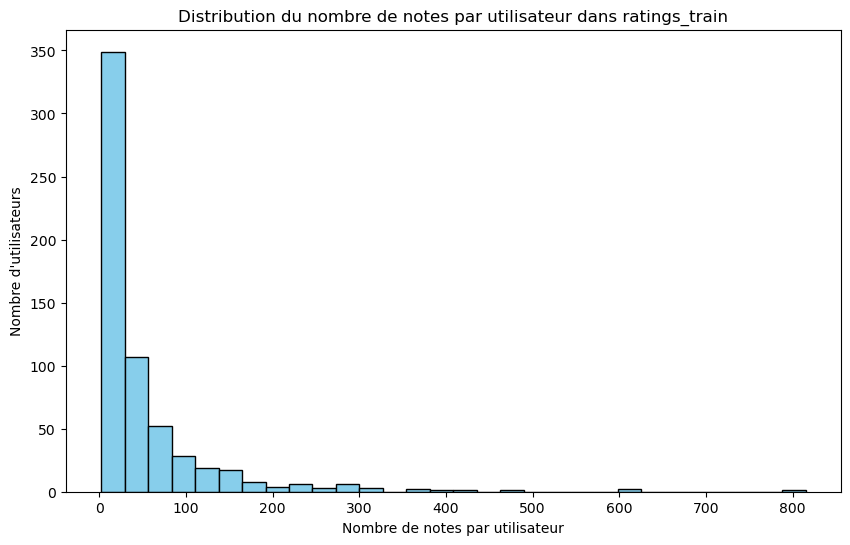

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer le nombre de notes par utilisateur dans ratings_train
# Assumant que chaque ligne est un utilisateur
notes_par_utilisateur = np.count_nonzero(~np.isnan(ratings_train), axis=1)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(notes_par_utilisateur, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de notes par utilisateur")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre de notes par utilisateur dans ratings_train")
plt.show()


## Distribution du nombre de notes par film

Ce graphique représente la répartition du nombre de notes attribuées à chaque film dans le jeu d'entraînement. La plupart des films ont reçu très peu d'évaluations

### Conclusion sur la distribution du nombre de notes par film

La forte concentration de films avec peu de notes (proche de zéro) on a donc une distribution inégale des évaluations, où seulement quelques films bénéficient d'une attention élevée de la part des utilisateurs. 


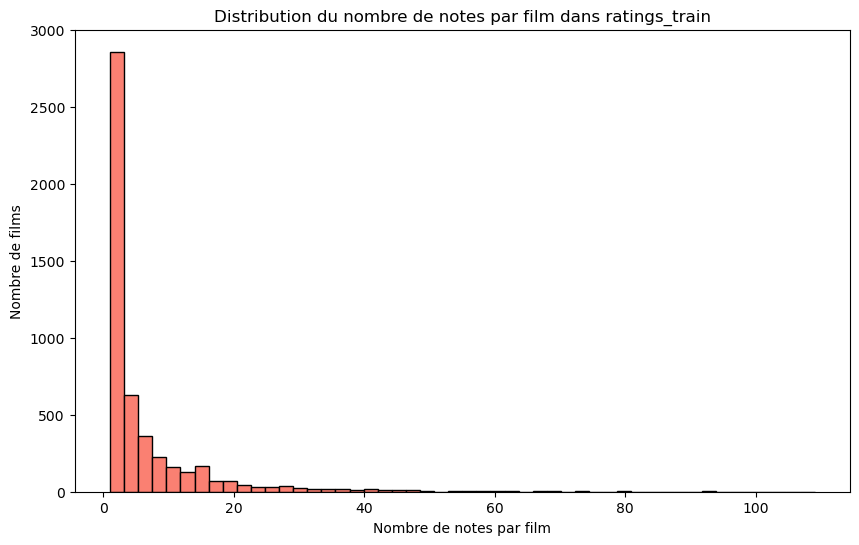

In [46]:

# Compter le nombre de notes par film (colonne)
film_counts = np.count_nonzero(~np.isnan(ratings_train), axis=0)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(film_counts, bins=50, color='salmon', edgecolor='black')
plt.xlabel("Nombre de notes par film")
plt.ylabel("Nombre de films")
plt.title("Distribution du nombre de notes par film dans ratings_train")
plt.show()


## Répartition des genres dans l'ensemble de données

Ce graphique en barres montre la répartition des différents genres de films dans l'ensemble de données. 
### Conclusion sur la répartition des genres

On observe que les genres les plus fréquents sont le "Drama", suivi de "Comedy" et "Action". Cette répartition indique une prévalence de certains genres dans l'ensemble de données, ce qui peut influencer les recommandations. 


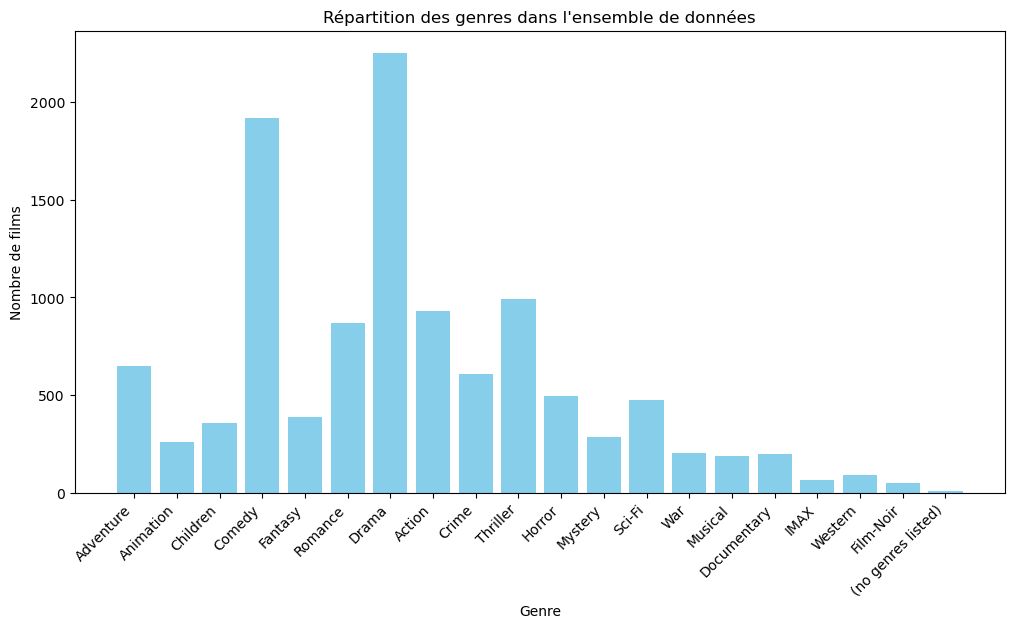

In [47]:
from collections import Counter

# Extraire les genres et compter leur fréquence
genres = [genre for sublist in namegenres[:, 1] for genre in sublist.split('|')]
genre_counts = Counter(genres)

# Créer le graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.title("Répartition des genres dans l'ensemble de données")
plt.show()

## Matrice de chaleur des notes (20 premiers utilisateurs et films)

Cette matrice de chaleur présente les notes attribuées par les 20 premiers utilisateurs aux 20 premiers films dans le jeu d'entraînement. Les valeurs indiquent les notes attribuées (de 1 à 5), et les cellules vides correspondent aux films non notés par les utilisateurs. Cette représentation visuelle permet de rapidement identifier les schémas d'évaluation et les tendances de notation.

### Conclusion sur la matrice de chaleur des notes

On observe  de nombreuses cases vides dues à l'absence de notation pour certains films par les utilisateurs. Cela montre le défi de la prédiction dans les systèmes de recommandation où la majorité des données sont manquantes. 


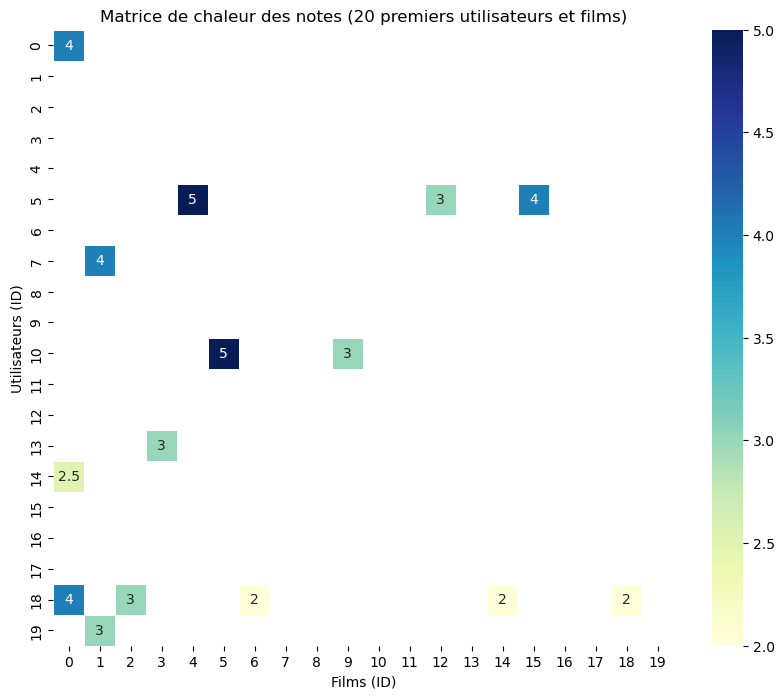

In [48]:
import seaborn as sns

# Extraire une sous-matrice de ratings_train pour les 20 premiers utilisateurs et les 20 premiers films
ratings_sample = ratings_train[:20, :20]

# Créer la matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_sample, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.xlabel("Films (ID)")
plt.ylabel("Utilisateurs (ID)")
plt.title("Matrice de chaleur des notes (20 premiers utilisateurs et films)")
plt.show()

In [49]:
import os

# Liste des fichiers à supprimer
files_to_delete = [
    "predicted_dense_matrix_svd.npy",
    "predicted_dense_matrix_ponderation_knn_svd.npy",
    "predicted_dense_matrix_popularity.npy",
    "predicted_dense_matrix_hybrid_collab_content.npy",
    "predicted_dense_matrix_autorec.npy",
    "predicted_sparse_matrix_autorec.npy",
    "predicted_dense_matrix_laplacian.npy",
    "predicted_dense_matrix_hybrid_svd_knn.npy",
    "predicted_sparse_matrix_dmf.npz"
]

# Suppression des fichiers
for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"{file} supprimé.")
    else:
        print(f"{file} n'existe pas.")


predicted_dense_matrix_svd.npy n'existe pas.
predicted_dense_matrix_ponderation_knn_svd.npy n'existe pas.
predicted_dense_matrix_popularity.npy n'existe pas.
predicted_dense_matrix_hybrid_collab_content.npy n'existe pas.
predicted_dense_matrix_autorec.npy n'existe pas.
predicted_sparse_matrix_autorec.npy supprimé.
predicted_dense_matrix_laplacian.npy n'existe pas.
predicted_dense_matrix_hybrid_svd_knn.npy n'existe pas.
predicted_sparse_matrix_dmf.npz supprimé.


# Méthode SVD 


Nous avons commencé par implémenter le modèle SVD (Singular Value Decomposition) pour la prédiction des notes. Le SVD est une technique de réduction dimensionnelle permettant de décomposer la matrice de notation en facteurs latents.

In [50]:
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)


In [51]:
train_data = [
    (i+1, j+1, ratings_train_matrix[i, j])
    for i in range(ratings_train_matrix.shape[0])
    for j in range(ratings_train_matrix.shape[1])
    if ratings_train_matrix[i, j] != 0
]


## Utilisation de la Bibliothèque Surprise

Pour implémenter les méthodes de recommandation, nous avons utilisé la bibliothèque `Surprise`, spécialisée dans les systèmes de recommandation. Surprise offre des implémentations efficaces d'algorithmes de filtrage collaboratif, comme SVD, et permet une évaluation facile avec des mesures comme RMSE. Cette bibliothèque est particulièrement utile pour les systèmes de recommandation car elle simplifie l'utilisation des jeux de données personnalisés et fournit des outils intégrés pour la validation croisée.



In [52]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy

# Création du reader avec l'échelle de notation
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))

# Transformation de `train_data` en DataFrame avec les colonnes appropriées
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])

# Chargement du dataset avec surprise
train_dataset = Dataset.load_from_df(train_data_df, reader)


##  Optimisation des Paramètres avec Grid Search

Nous avons commencé par implémenter le modèle SVD (Singular Value Decomposition) pour la prédiction des notes. Le SVD est une technique de réduction dimensionnelle permettant de décomposer la matrice de notation en facteurs latents.

Pour améliorer les performances, nous avons utilisé une recherche de grille (`GridSearchCV`) pour tester plusieurs valeurs de `n_factors`, `reg_all`, et `lr_all`. La recherche de grille permet de trouver la combinaison optimale de paramètres en minimisant le RMSE sur un jeu de validation. Grâce à cette optimisation, nous avons pu réduire le surapprentissage initialement observé avec SVD.


In [53]:
parameters = {"n_factors": [120, 150, 200, 250, 300], "reg_all": [0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.8], "lr_all": [0.01, 0.02, 0.03, 0.04, 0.05, 0.09]}


In [54]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])


Meilleurs paramètres : {'n_factors': 300, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8875971034052512


In [55]:
import pandas as pd

# Création de test_data en tant que DataFrame directement avec les colonnes nécessaires
test_data = [
    (i + 1, j + 1, ratings_test_matrix[i, j])
    for i in range(ratings_test_matrix.shape[0])
    for j in range(ratings_test_matrix.shape[1])
    if ratings_test_matrix[i, j] != 0
]

# Conversion en DataFrame avec les colonnes 'user_id', 'item_id', 'rating'
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])

# Utilisation du DataFrame avec Dataset.load_from_df
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()  # Création d'un vrai testset


In [56]:
# Utiliser le meilleur modèle pour l'entraînement complet
best_model = grid_search.best_estimator["rmse"]
trainset_full = train_dataset.build_full_trainset()
best_model.fit(trainset_full)


## Évaluation des Performances : Calcul du RMSE et du R²

Nous avons évalué les performances de chaque modèle en calculant le RMSE et le R² sur les jeux d'entraînement et de test. Le RMSE mesure l'erreur quadratique moyenne des prédictions, tandis que le R² évalue la proportion de variance expliquée par le modèle. 

Le calcul du R² a été adapté pour ne prendre en compte que les valeurs non-nulles, en utilisant un masque pour ignorer les valeurs manquantes dans les matrices de notation.


In [57]:
from sklearn.metrics import r2_score

# Prédire les valeurs pour l'ensemble de test
test_predictions = best_model.test(testset)

# Calcul du RMSE pour le jeu de test avec Surprise
rmse_with_mask_test_svd = accuracy.rmse(test_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test = np.array([pred.est for pred in test_predictions])
actual_ratings_test = np.array([pred.r_ui for pred in test_predictions])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test)
r2_with_mask_test_svd = r2_score(actual_ratings_test[mask_test], predicted_ratings_test[mask_test])

# Affichage des résultats
print("RMSE SVD (Test) :", rmse_with_mask_test_svd)
print("R² SVD (Test) :", r2_with_mask_test_svd)


RMSE: 0.8839
RMSE SVD (Test) : 0.8838967649594539
R² SVD (Test) : 0.27321935777373574


In [58]:
# Prédire les valeurs pour l'ensemble d'entraînement
train_predictions = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement avec Surprise
rmse_with_mask_train_svd = accuracy.rmse(train_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train = np.array([pred.est for pred in train_predictions])
actual_ratings_train = np.array([pred.r_ui for pred in train_predictions])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train)
r2_with_mask_train_svd = r2_score(actual_ratings_train[mask_train], predicted_ratings_train[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE SVD (Entraînement - Surprise) :", rmse_with_mask_train_svd)
print("R² SVD (Entraînement - Surprise) :", r2_with_mask_train_svd)


RMSE: 0.6513
RMSE SVD (Entraînement - Surprise) : 0.6512571427434488
R² SVD (Entraînement - Surprise) : 0.6022261124361769


In [59]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_with_mask_test_svd - rmse_with_mask_train_svd}")
print(f"Différence R² (test - entraînement) : {r2_with_mask_test_svd - r2_with_mask_train_svd}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.2326396222160051
Différence R² (test - entraînement) : -0.3290067546624411


## Génération des Prédictions et Vérification de la Matrice Remplie

Les prédictions SVD ont été générées pour les indices spécifiques listés dans `list_index_wanted`. Une matrice dense a été construite pour stocker ces prédictions, en vérifiant que tous les indices souhaités étaient bien remplis. Cette matrice dense nous permet de sauvegarder et de visualiser les prédictions

La matrice a été sauvegardée sous le nom `predicted_dense_matrix_svd.npy` 


In [60]:
import numpy as np
import scipy.sparse as sp

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Générer les prédictions SVD pour les indices souhaités
user_indices_batch = []
item_indices_batch = []
svd_predictions = []

# Parcourir les indices souhaités et obtenir les prédictions SVD
for user_id, item_id in list_index_wanted:
    if user_id < ratings_train_matrix.shape[0] and item_id < ratings_train_matrix.shape[1]:  # Vérifier les limites
        svd_pred = best_model.predict(user_id, item_id).est
        svd_predictions.append(svd_pred)
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)

# Créer une matrice dense pour stocker les prédictions SVD
predicted_dense_matrix_svd = np.zeros((ratings_train_matrix.shape[0], ratings_train_matrix.shape[1]))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_dense_matrix_svd[user_id, item_id] = svd_predictions[idx]

# Sauvegarder la matrice dense au format npy
np.save("predicted_dense_matrix_svd.npy", predicted_dense_matrix_svd)
print("Matrice dense avec les prédictions SVD sauvegardée sous 'predicted_dense_matrix_svd.npy'.")

# Charger la matrice prédite pour vérification
predicted_dense_matrix = np.load("predicted_dense_matrix_svd.npy")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, item_id in list_index_wanted:
    if predicted_dense_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {np.count_nonzero(predicted_dense_matrix)}")
print("Affichage de quelques prédictions :")
print(predicted_dense_matrix[:10, :10])  # Affiche un sous-ensemble pour vérifier

if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (SVD).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Matrice dense avec les prédictions SVD sauvegardée sous 'predicted_dense_matrix_svd.npy'.
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.87048488 3.48742556 3.09847726 0.         3.15705983
  0.         0.         0.         0.        ]
 [3.6745132  0.         0.         0.         0.         0.
  0.         0.         0.         0.    

# Méthode KNN 

Pour cette méthode, nous avons utilisé un modèle KNN. Le but était de tester les performances du modèle KNN en se basant uniquement sur la similarité entre items. Grâce à une recherche par grille (GridSearchCV), nous avons optimisé les hyperparamètres du modèle, en sélectionnant le meilleur nombre de voisins k, le nombre minimal de voisins min_k, et le type de mesure de similarité (cosine ou MSD).



On importe les bibliothèques essentielles pour notre approche KNN. Surprise est utilisé pour les modèles de recommandation, GridSearchCV pour optimiser les paramètres du modèle, et r2_score de sklearn pour évaluer les performances en termes de R².

In [61]:
# Étape 1 : Import des bibliothèques nécessaires
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


On charge les données d'entraînement pour les transformer dans un format compatible avec Surprise. Ce format facilite le traitement des données et leur utilisation dans un modèle KNN.

In [62]:
# Étape 2 : Chargement des données (en supposant que 'ratings_train_matrix' est déjà chargé)
reader = Reader(rating_scale=(1, 5))  # adapte l'échelle si nécessaire
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
train_dataset = Dataset.load_from_df(train_data_df, reader)


On configure les paramètres pour GridSearchCV afin d'optimiser le modèle KNN. On explore différents nombres de voisins (k), des valeurs minimales de voisins (min_k), et deux mesures de similarité (cosine et MSD) pour déterminer la meilleure combinaison en termes de RMSE.

In [63]:
# Étape 3 : Définir les paramètres de recherche pour GridSearchCV
param_grid = {
    'k': [20, 30, 40],  # Essai avec différents nombres de voisins
    'min_k': [1, 3, 5],  # Nombre minimal de voisins
    'sim_options': {
        'name': ['cosine', 'msd'],  # Différentes mesures de similarité
        'user_based': [False]  # Basé sur les items uniquement
    }
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5, refit=True)

# Exécuter la recherche
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params['rmse'])
print("Meilleur RMSE :", grid_search.best_score['rmse'])

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator['rmse']


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [64]:
# Étape 4 : Utiliser le modèle optimisé KNN pour prédire les valeurs pour l'ensemble d'entraînement
trainset_full = train_dataset.build_full_trainset()
train_predictions_knn = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement
rmse_train_knn_seul = accuracy.rmse(train_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train_knn = np.array([pred.est for pred in train_predictions_knn])
actual_ratings_train_knn = np.array([pred.r_ui for pred in train_predictions_knn])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train_knn)
r2_train_knn_seul = r2_score(actual_ratings_train_knn[mask_train], predicted_ratings_train_knn[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE (Entraînement - KNN) :", rmse_train_knn_seul)
print("R² (Entraînement - KNN) :", r2_train_knn_seul)


RMSE: 0.4357
RMSE (Entraînement - KNN) : 0.43572341170452666
R² (Entraînement - KNN) : 0.8219454558637008


In [65]:
# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(1, 5))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions_knn = best_model.test(testset)

# Calcul du RMSE pour le jeu de test
rmse_test_knn_seul = accuracy.rmse(test_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test_knn = np.array([pred.est for pred in test_predictions_knn])
actual_ratings_test_knn = np.array([pred.r_ui for pred in test_predictions_knn])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test_knn)
r2_test_knn_seul = r2_score(actual_ratings_test_knn[mask_test], predicted_ratings_test_knn[mask_test])

# Affichage des résultats pour le jeu de test
print("RMSE (Test - KNN) :", rmse_test_knn_seul)
print("R² (Test - KNN) :", r2_test_knn_seul)


RMSE: 0.9295
RMSE (Test - KNN) : 0.9294898382412031
R² (Test - KNN) : 0.19630816739517953


In [66]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_knn_seul - rmse_train_knn_seul}")
print(f"Différence R² (test - entraînement) : {r2_test_knn_seul - r2_train_knn_seul}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.49376642653667646
Différence R² (test - entraînement) : -0.6256372884685213


# Conclusion 
Les résultats montrent un surapprentissage avec le KNN seul, le modèle s'ajuste très bien sur les données d'entraînement, mais il a du mal  à généraliser sur les données de test, comme le montrent  les scores de RMSE et de R². Cette différence  entre le RMSE et le R² des jeux d'entraînement et de test indique un surapprentissage important.

Les résultats obtenus (RMSE d'entraînement très faible et R² élevé, mais performance en test nettement inférieure) montrent que KNN seul ne parvient pas  à bien généraliser sur des données non vues. Cette observation nous a amenés à expérimenter des combinaisons et pondérations avec le SVD pour atténuer ce surapprentissage et améliorer la robustesse du modèle sur les données de test.

# Méthode Hybride (SVD + KNN avec pondération) 

In [67]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [68]:
# Charger les matrices de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Préparer les données pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [69]:
# Définir et entraîner le modèle SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)


## Optimisation du Modèle KNN avec Recherche de Grille

Pour le modèle KNN, nous utilisons `KNNWithZScore` de la bibliothèque Surprise, qui permet de normaliser les scores de similarité entre utilisateurs ou items. Une recherche de grille (`GridSearchCV`) est effectuée pour trouver les meilleurs paramètres pour le KNN, comme le nombre de voisins (`k`) et le type de similarité (`cosine` ou `msd`). Le modèle KNN est alors ajusté avec les meilleurs paramètres trouvés.


In [70]:
# Définir les paramètres et faire un GridSearch pour KNNWithZScore
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

## Pondération Hybride entre SVD et KNN

Pour tirer parti des avantages des deux modèles, nous avons combiné les prédictions de SVD et de KNN à l'aide d'une pondération dynamique. Le paramètre `alpha` contrôle la pondération entre les deux modèles (par exemple, `alpha=0.5` ). Cette approche hybride permet de capturer à la fois les relations latentes (SVD) et les similarités locales (KNN) entre items.

La fonction `hybrid_prediction` calcule les prédictions hybrides en prenant en compte la pondération de chaque modèle.


In [71]:
# Définir la pondération pour la combinaison des prédictions SVD et KNN
alpha = 0.5  # Pondération pour SVD (ajustable entre 0 et 1)

# Fonction pour calculer les prédictions hybrides
def hybrid_prediction(uid, iid):
    # Prédiction SVD
    pred_svd = svd.predict(uid, iid).est
    # Prédiction KNN
    pred_knn = best_knn_model.predict(uid, iid).est
    # Combinaison pondérée
    return alpha * pred_svd + (1 - alpha) * pred_knn


In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# Masque pour les valeurs non nulles dans les données d'entraînement
mask_train = (ratings_train_matrix > 0)

# Calcul des prédictions hybrides pour le jeu d'entraînement
train_predictions_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
actual_ratings_train = []

for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        if mask_train[user_id, item_id]:  # Seules les valeurs présentes sont prises en compte
            pred = hybrid_prediction(user_id, item_id)
            train_predictions_hybrid[user_id, item_id] = pred
            actual_ratings_train.append(ratings_train_matrix[user_id, item_id])

# Calcul du RMSE et du R² pour l'entraînement
rmse_train_hybrid = np.sqrt(mean_squared_error(actual_ratings_train, train_predictions_hybrid[mask_train]))
r2_train_hybrid = r2_score(actual_ratings_train, train_predictions_hybrid[mask_train])
print("RMSE (Entraînement - Hybride SVD + KNN) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride SVD + KNN) :", r2_train_hybrid)


RMSE (Entraînement - Hybride SVD + KNN) : 0.5477637910214226
R² (Entraînement - Hybride SVD + KNN) : 0.7186040050127512


In [73]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])


In [74]:
# Masque pour les valeurs non nulles dans les données de test
mask_test = (ratings_test_matrix > 0)

# Calcul des prédictions hybrides pour le jeu de test
test_predictions_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
actual_ratings_test = []

for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        if mask_test[user_id, item_id]:  # Seules les valeurs présentes sont prises en compte
            pred = hybrid_prediction(user_id, item_id)
            test_predictions_hybrid[user_id, item_id] = pred
            actual_ratings_test.append(ratings_test_matrix[user_id, item_id])

# Calcul du RMSE et du R² pour le test
rmse_test_hybrid = np.sqrt(mean_squared_error(actual_ratings_test, test_predictions_hybrid[mask_test]))
r2_test_hybrid = r2_score(actual_ratings_test, test_predictions_hybrid[mask_test])

print("RMSE (Test - Hybride SVD + KNN) :", rmse_test_hybrid)
print("R² (Test - Hybride SVD + KNN) :", r2_test_hybrid)


RMSE (Test - Hybride SVD + KNN) : 0.8830466117389861
R² (Test - Hybride SVD + KNN) : 0.27461675571556576


In [75]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_hybrid - rmse_train_hybrid}")
print(f"Différence R² (test - entraînement) : {r2_test_hybrid - r2_train_hybrid}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.33528282071756355
Différence R² (test - entraînement) : -0.44398724929718547


# Conclusion 
En comparant nos résutalts avec la méthode de recommandation KNN nous remarqons que  : 

-La combinaison des prédictions SVD et KNN avec une pondération de 0.7 pour SVD a permis de réduire le RMSE en test (de 0.9301 à 0.8831) par rapport à la méthode KNN seule. Le R² est également amélioré, passant de 0.1953 à 0.2745

-On observe une augmentation du RMSE en entraînement (de 0.3998 pour KNN seul à 0.5493 pour le modèle hybride). Mais cela est  un signe positif indiquant que le modèle surapprend moins sur les données d'entraînement

-La différence de performance entre l'entraînement et le test est moins marquée avec le modèle hybride, ce qui confirme que la combinaison permet une meilleure généralisation aux données non vues. Par exemple les différences de R2 pour KNN seul est de -0.6548	et avec la pondération KNN+SVD on a -0.4425

Ainsi, pour atténuer le surapprentissage, nous passons au test de plusieurs valeurs d'alpha. Cette approche nous permettra de trouver la pondération optimale entre SVD et KNN, de manière à minimiser le RMSE et à améliorer le R² sur le jeu de test

## Ajustement de la Pondération Alpha pour la Méthode Hybride

Pour optimiser la combinaison des modèles SVD et KNN dans notre méthode hybride, nous avons testé plusieurs valeurs du paramètre alpha, allant de 0.1 à 0.9 par incréments de 0.1. Ce paramètre alpha contrôle la pondération entre les prédictions de SVD et de KNN :
- Un alpha proche de 1 privilégie les prédictions du modèle SVD.
- Un alpha proche de 0 privilégie les prédictions du modèle KNN.

L’objectif est de trouver la valeur de alpha qui minimise le RMSE sur le jeu de test, assurant ainsi une meilleure précision des recommandations.


nous importons les bibliothèques nécessaires pour charger et traiter les données, notamment Surprise pour les modèles KNN et SVD, pandas et numpy pour la manipulation des données, et sklearn pour les métriques de performance.
On charge les matrices de notation d'entraînement et de test. Ces matrices contiennent les évaluations de différents utilisateurs pour des items donnés.

on convertit la matrice d'entraînement en un format compatible avec Surprise. Les évaluations nulles (0) sont ignorées pour ne conserver que les évaluations présentes.

On entraîne les deux modèles. D'abord, le modèle SVD est entraîné sur l'ensemble d'entraînement complet. Ensuite, un GridSearchCV est utilisé pour sélectionner les meilleurs hyperparamètres pour KNN (nombre de voisins, mesure de similarité, etc.), et le modèle KNN est entraîné avec ces meilleurs paramètres.

In [76]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger les données
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)

# Entraîner SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Entraîner KNN
param_grid = {
    'k': [20, 30, 40],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

## Fonction d'Évaluation Hybride avec Alpha Variable

La fonction `evaluate_hybrid` calcule le RMSE et le R² pour chaque valeur de alpha, en combinant les prédictions de SVD et de KNN de manière pondérée. Pour chaque paire de prédictions SVD et KNN nous appliquons la pondération alpha et calculons le RMSE et le R² sur les jeux d'entraînement et de test. Cette approche nous permet d'observer l'impact de alpha sur la précision de la méthode hybride.

On teste plusieurs valeurs de alpha (de 0.1 à 0.9 par pas de 0.1) pour combiner les prédictions SVD et KNN, et affiche les métriques RMSE et R² pour chaque valeur. La meilleure valeur de alpha, celle qui minimise le RMSE sur le jeu de test, est sélectionnée et affichée.


In [77]:
from sklearn.metrics import mean_squared_error, r2_score

# Masques pour les valeurs non nulles
mask_train = (ratings_train_matrix > 0)
mask_test = (ratings_test_matrix > 0)

# Fonction pour évaluer le modèle hybride avec différents alphas
def evaluate_hybrid(alpha):
    # Prédictions pour le jeu d'entraînement avec SVD et KNN
    train_predictions_svd = svd.test(trainset.build_testset())
    train_predictions_knn = best_knn_model.test(trainset.build_testset())

    # Combinaison pondérée des prédictions pour le jeu d'entraînement
    predicted_ratings_train_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
    actual_ratings_train_hybrid = []

    for svd_pred, knn_pred in zip(train_predictions_svd, train_predictions_knn):
        uid, iid = int(svd_pred.uid), int(svd_pred.iid)
        predicted_ratings_train_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est
        actual_ratings_train_hybrid.append(svd_pred.r_ui)

    # Calcul du RMSE et R² pour le jeu d'entraînement avec masque
    rmse_train = np.sqrt(mean_squared_error(
        ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train]))
    r2_train = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train])

    # Prédictions pour le jeu de test avec SVD et KNN
    test_data = []
    for user_id in range(ratings_test_matrix.shape[0]):
        for item_id in range(ratings_test_matrix.shape[1]):
            rating = ratings_test_matrix[user_id, item_id]
            if rating > 0:
                test_data.append([user_id, item_id, rating])
                
    test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
    test_dataset = Dataset.load_from_df(test_data_df, reader)
    testset = test_dataset.build_full_trainset().build_testset()

    test_predictions_svd = svd.test(testset)
    test_predictions_knn = best_knn_model.test(testset)

    # Combinaison pondérée des prédictions pour le jeu de test
    predicted_ratings_test_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
    actual_ratings_test_hybrid = []

    for svd_pred, knn_pred in zip(test_predictions_svd, test_predictions_knn):
        uid, iid = int(svd_pred.uid), int(svd_pred.iid)
        predicted_ratings_test_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est
        actual_ratings_test_hybrid.append(svd_pred.r_ui)

    # Calcul du RMSE et R² pour le jeu de test avec masque
    rmse_test = np.sqrt(mean_squared_error(
        ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test]))
    r2_test = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test])

    return rmse_train, r2_train, rmse_test, r2_test


# Tester plusieurs valeurs de alpha et afficher les résultats
alphas = np.arange(0.1, 1.0, 0.1)
best_alpha = 0
best_rmse_test = float("inf")

for alpha in alphas:
    rmse_train, r2_train, rmse_test, r2_test = evaluate_hybrid(alpha)
    print(f"Alpha: {alpha:.1f} | RMSE (Entraînement): {rmse_train:.4f} | R² (Entraînement): {r2_train:.4f} | RMSE (Test): {rmse_test:.4f} | R² (Test): {r2_test:.4f}")
    
    if rmse_test < best_rmse_test:
        best_rmse_test = rmse_test
        best_alpha = alpha

print(f"\nMeilleure valeur de alpha: {best_alpha:.1f} avec RMSE (Test): {best_rmse_test:.4f}")


Alpha: 0.1 | RMSE (Entraînement): 0.5159 | R² (Entraînement): 0.7504 | RMSE (Test): 0.9132 | R² (Test): 0.2242
Alpha: 0.2 | RMSE (Entraînement): 0.5150 | R² (Entraînement): 0.7512 | RMSE (Test): 0.9024 | R² (Test): 0.2425
Alpha: 0.3 | RMSE (Entraînement): 0.5186 | R² (Entraînement): 0.7478 | RMSE (Test): 0.8936 | R² (Test): 0.2571
Alpha: 0.4 | RMSE (Entraînement): 0.5266 | R² (Entraînement): 0.7400 | RMSE (Test): 0.8870 | R² (Test): 0.2681
Alpha: 0.5 | RMSE (Entraînement): 0.5387 | R² (Entraînement): 0.7278 | RMSE (Test): 0.8825 | R² (Test): 0.2755
Alpha: 0.6 | RMSE (Entraînement): 0.5547 | R² (Entraînement): 0.7114 | RMSE (Test): 0.8803 | R² (Test): 0.2792
Alpha: 0.7 | RMSE (Entraînement): 0.5743 | R² (Entraînement): 0.6907 | RMSE (Test): 0.8802 | R² (Test): 0.2792
Alpha: 0.8 | RMSE (Entraînement): 0.5971 | R² (Entraînement): 0.6656 | RMSE (Test): 0.8824 | R² (Test): 0.2756
Alpha: 0.9 | RMSE (Entraînement): 0.6228 | R² (Entraînement): 0.6362 | RMSE (Test): 0.8868 | R² (Test): 0.2684



# Alpha à 0,7
D'après les résultats, la meilleure valeur de alpha est 0.7, offrant un RMSE de test de 0.8803 et un R² de test de 0.2692. Nous avons structurer le code pour calculer les métriques de performance (RMSE et R²) pour les jeux d'entraînement et de test avec cette valeur optimale d'alpha.




In [78]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger la matrice de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)

# Entraîner SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Entraîner KNN avec les meilleurs paramètres trouvés précédemment
param_grid = {
    'k': [20, 30, 40],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [79]:
# Définir alpha optimal trouvé
alpha = 0.7

# Masque pour les valeurs observées dans le jeu d'entraînement
mask_train = (ratings_train_matrix > 0)

# Prédictions pour le jeu d'entraînement avec SVD et KNN
train_predictions_svd = svd.test(trainset.build_testset())
train_predictions_knn = best_knn_model.test(trainset.build_testset())

# Combinaison pondérée des prédictions pour le jeu d'entraînement
predicted_ratings_train_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
for svd_pred, knn_pred in zip(train_predictions_svd, train_predictions_knn):
    uid, iid = int(svd_pred.uid), int(svd_pred.iid)
    predicted_ratings_train_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est

# Calcul du RMSE et R² pour le jeu d'entraînement en utilisant le masque
rmse_train_pond_knn_svd = np.sqrt(np.mean((ratings_train_matrix[mask_train] - predicted_ratings_train_hybrid[mask_train]) ** 2))
r2_train_pond_knn_svd = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train])

print("RMSE (Entraînement - Pondération KNN + SVD) :", rmse_train_pond_knn_svd)
print("R² (Entraînement - Pondération KNN + SVD) :", r2_train_pond_knn_svd)


RMSE (Entraînement - Pondération KNN + SVD) : 0.576487233391155
R² (Entraînement - Pondération KNN + SVD) : 0.6883187629219272


In [80]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()


In [81]:
# Masque pour les valeurs observées dans le jeu de test
mask_test = (ratings_test_matrix > 0)

# Utiliser le modèle KNN sur les prédictions SVD pour prédire le jeu de test
test_predictions_svd = svd.test(testset)
test_predictions_knn = best_knn_model.test(testset)

# Combinaison pondérée des prédictions pour le jeu de test
predicted_ratings_test_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
for svd_pred, knn_pred in zip(test_predictions_svd, test_predictions_knn):
    uid, iid = int(svd_pred.uid), int(svd_pred.iid)
    predicted_ratings_test_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est

# Calcul du RMSE et R² pour le jeu de test en utilisant le masque
rmse_test_pond_knn_svd = np.sqrt(np.mean((ratings_test_matrix[mask_test] - predicted_ratings_test_hybrid[mask_test]) ** 2))
r2_test_pond_knn_svd = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test])

print("RMSE (Test - Pondération KNN + SVD) :", rmse_test_pond_knn_svd)
print("R² (Test - Pondération KNN + SVD) :", r2_test_pond_knn_svd)


RMSE (Test - Pondération KNN + SVD) : 0.880110639298714
R² (Test - Pondération KNN + SVD) : 0.2794322767552282


# Conclusion
En testant plusieurs valeurs de alpha pour la pondération entre les prédictions de SVD et KNN, nous avons pu améliorer les performances de notre méthode KKN +SVD. Au début notré méthode avait un problème de surapprentissage avec un R² et un RMSE qui montraient une forte différence entre les jeux d'entraînement et de test.

En ajustant alpha et en trouvant la meilleure valeur à 0,7, nous avons réussi à réduire cet écart et à améliorer la capacité de généralisation du modèle. Avec cette valeur, le RMSE de test est passé à 0,8816 ce qui représente une amélioration par rapport aux essais initiaux. De plus, le R² de test de 0,2768 montre que le modèle hybride parvient maintenant à mieux capturer  les relations présentes dans les données de test, tout en limitant le surapprentissage qu'il y avait au début.

Cette approche hybride, combinant les forces de SVD pour les relations latentes et de KNN pour les similarités locales, a permis de trouver un meilleur équilibre nous avons donc ainsi une meilleure performance.

Matrice creuse 

In [82]:
import numpy as np
import scipy.sparse as sp

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Préparer les données pour les indices souhaités
user_indices_batch = []
item_indices_batch = []
svd_predictions = []
knn_predictions = []

# Générer les prédictions SVD et KNN pour les indices souhaités
alpha = 0.5  # Exemple de valeur pour alpha, à ajuster en fonction des besoins
for user_id, item_id in list_index_wanted:
    if user_id < ratings_train_matrix.shape[0] and item_id < ratings_train_matrix.shape[1]:  # Vérifier les limites
        svd_pred = svd.predict(user_id, item_id).est
        knn_pred = best_knn_model.predict(user_id, item_id).est
        svd_predictions.append(svd_pred)
        knn_predictions.append(knn_pred)
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)

# Créer une matrice dense pour stocker les prédictions hybrides
predicted_dense_matrix_hybrid = np.zeros((ratings_train_matrix.shape[0], ratings_train_matrix.shape[1]))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_dense_matrix_hybrid[user_id, item_id] = alpha * svd_predictions[idx] + (1 - alpha) * knn_predictions[idx]

# Sauvegarder la matrice dense au format npy
np.save("predicted_dense_matrix_ponderation_knn_svd.npy", predicted_dense_matrix_hybrid)
print("Matrice dense avec les prédictions hybrides (KNN + SVD) sauvegardée sous 'predicted_dense_matrix_ponderation_knn_svd.npy'.")

# Charger la matrice dense pour vérification
predicted_dense_matrix = np.load("predicted_dense_matrix_ponderation_knn_svd.npy")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice dense
for user_id, item_id in list_index_wanted:
    if predicted_dense_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {np.count_nonzero(predicted_dense_matrix)}")
print("Affichage de quelques prédictions :")
print(predicted_dense_matrix[:10, :10])  # Affiche un sous-ensemble pour vérifier

if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (Pondération KNN + SVD).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Matrice dense avec les prédictions hybrides (KNN + SVD) sauvegardée sous 'predicted_dense_matrix_ponderation_knn_svd.npy'.
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.62502577 3.23235745 2.63370614 0.         4.14102799
  0.         0.         0.         0.        ]
 [3.6682202  0.         0.         0.         0.         0.
  0.    

# Combinaison KNN SVD

Pour tester la combinaison de SVD et KNN, nous avons d'abord utilisé le modèle SVD pour générer des prédictions de base, puis appliqué KNNWithZScore sur les résultats prédits par SVD. Cette approche vise à capturer les relations latentes via SVD, tout en affinant les prédictions à l'aide de KNN pour exploiter les similarités entre les utilisateurs.

In [83]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger la matrice de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')


Le centrage des notes permet de réduire les biais d'utilisateurs en soustrayant la moyenne des notes de chaque utilisateur. Cela aide à capturer les préférences relatives des utilisateurs, en traitant chaque note par rapport à la moyenne de l’utilisateur. Les valeurs NaN sont remplacées par des zéros pour faciliter les calculs.
Nous convertissons les matrices en DataFrame pour les rendre compatibles avec la bibliothèque Surprise. Seules les valeurs de notation non nulles sont incluses pour réduire la taille du DataFrame et améliorer l'efficacité des traitements.

In [84]:
# Centrer les notes pour chaque utilisateur dans les données d'entraînement
user_mean_train = np.nanmean(np.where(ratings_train_matrix != 0, ratings_train_matrix, np.nan), axis=1)
ratings_train_centered = ratings_train_matrix - user_mean_train[:, None]
ratings_train_centered = np.nan_to_num(ratings_train_centered, nan=0)

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)


Nous entraînons un modèle SVD pour capturer les relations latentes entre les utilisateurs et les items. SVD (Décomposition en Valeurs Singulières) est une méthode couramment utilisée dans les systèmes de recommandation pour sa capacité à décomposer les matrices en facteurs latents.

In [85]:
# Définir et entraîner le modèle SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Utiliser SVD pour obtenir des prédictions de base
train_predictions_svd = svd.test(trainset.build_testset())
predicted_ratings_svd = np.array([pred.est for pred in train_predictions_svd])


Nous utilisons les prédictions SVD comme données d'entrée pour un modèle KNN. Cela permet de raffiner les prédictions en utilisant des similarités locales. Le but est de combiner les avantages de SVD (relations latentes) et KNN (similarités locales).

In [86]:
# Préparer les données pour appliquer KNN sur les prédictions SVD
train_data_knn = []
for idx, pred in enumerate(train_predictions_svd):
    train_data_knn.append([pred.uid, pred.iid, pred.est])

train_data_knn_df = pd.DataFrame(train_data_knn, columns=["user_id", "item_id", "rating"])
train_dataset_knn = Dataset.load_from_df(train_data_knn_df, reader)


Nous effectuons une recherche en grille pour optimiser les paramètres de KNN. GridSearchCV nous aide à trouver les meilleurs paramètres pour minimiser l’erreur RMSE. Les paramètres optimaux sont ensuite utilisés pour entraîner le modèle KNN ajusté sur les résultats de SVD.

In [87]:
# Appliquer KNN avec les résultats SVD
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset_knn)

# Meilleurs paramètres et meilleur modèle
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(train_dataset_knn.build_full_trainset())


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [88]:
# Masque pour les valeurs observées dans le jeu d'entraînement
mask_train = (ratings_train_matrix > 0)

# Prédictions pour le jeu d'entraînement avec le modèle KNN ajusté sur SVD
train_predictions_combined = best_knn_model.test(trainset.build_testset())

# Créer une matrice de prédictions pour le jeu d'entraînement
predicted_ratings_train_combined = np.zeros_like(ratings_train_matrix, dtype=float)
for pred in train_predictions_combined:
    uid, iid = int(pred.uid), int(pred.iid)
    predicted_ratings_train_combined[uid, iid] = pred.est

# Calcul du RMSE et du R² pour le jeu d'entraînement en utilisant le masque
rmse_train_combined_svd_knn = np.sqrt(np.mean((ratings_train_matrix[mask_train] - predicted_ratings_train_combined[mask_train]) ** 2))
r2_train_combined_svd_knn = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_combined[mask_train])

print("RMSE (Entraînement - SVD + KNN) :", rmse_train_combined_svd_knn)
print("R² (Entraînement - SVD + KNN) :", r2_train_combined_svd_knn)


RMSE (Entraînement - SVD + KNN) : 0.7710157891105124
R² (Entraînement - SVD + KNN) : 0.4424833854173149


In [89]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()


In [90]:
# Masque pour les valeurs observées dans le jeu de test
mask_test = (ratings_test_matrix > 0)

# Utiliser le modèle KNN sur les prédictions SVD pour prédire le jeu de test
test_predictions_combined = best_knn_model.test(testset)

# Créer une matrice de prédictions pour le jeu de test
predicted_ratings_test_combined = np.zeros_like(ratings_test_matrix, dtype=float)
for pred in test_predictions_combined:
    uid, iid = int(pred.uid), int(pred.iid)
    predicted_ratings_test_combined[uid, iid] = pred.est

# Calcul du RMSE et R² pour le jeu de test en utilisant le masque
rmse_test_combined_svd_knn = np.sqrt(np.mean((ratings_test_matrix[mask_test] - predicted_ratings_test_combined[mask_test]) ** 2))
r2_test_combined_svd_knn = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_combined[mask_test])

print("RMSE (Test - SVD + KNN) :", rmse_test_combined_svd_knn)
print("R² (Test - SVD + KNN) :", r2_test_combined_svd_knn)


RMSE (Test - SVD + KNN) : 0.894826844669463
R² (Test - SVD + KNN) : 0.25513379358392196


In [91]:
# Comparaison des résultats entre le jeu d'entraînement et le jeu de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_combined_svd_knn - rmse_train_combined_svd_knn}")
print(f"Différence R² (test - entraînement) : {r2_test_combined_svd_knn - r2_train_combined_svd_knn}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.12381105555895067
Différence R² (test - entraînement) : -0.18734959183339295


# Conclusion 

La pondération dynamique (KNN + SVD) est plus performante en termes de précision (RMSE plus faible) et d'explicabilité des données (R² plus élevé) pour les jeux d'entraînement et de test, ce qui en fait une approche globalement plus efficace pour ce jeu de données. Mais, elle est légèrement plus sujette au surapprentissage, comme l'indique la différence plus importante entre les scores d'entraînement et de test.

En revanche, la combinaison séquentielle (SVD + KNN) offre une meilleure stabilité entre l'entraînement et le test, bien qu'elle soit moins précise. 

En résumé : La pondération dynamique est plus avantageuse pour des performances optimales, mais la combinaison séquentielle pourrait être choisie dans des contextes nécessitant une meilleure robustesse.

La combinaison des méthodes SVD et KNN permet d'améliorer les performances en équilibrant les forces de chaque modèle. Comparée à l'utilisation de KNN seul, cette approche réduit la différence de performance entre l'entraînement et le test, ce qui indique une meilleure généralisatio

matrice creuse 

In [92]:
import scipy.sparse as sp
import numpy as np

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')
alpha = 0.5  # Pondération pour la combinaison SVD et KNN

# Préparer les données pour les indices souhaités
user_indices_batch = []
item_indices_batch = []
svd_predictions = []
knn_predictions = []

# Générer les prédictions SVD et KNN pour les indices souhaités
for user_id, item_id in list_index_wanted:
    if user_id < ratings_train_matrix.shape[0] and item_id < ratings_train_matrix.shape[1]:  # Vérifier les limites
        svd_pred = svd.predict(user_id, item_id).est
        knn_pred = best_knn_model.predict(user_id, item_id).est
        svd_predictions.append(svd_pred)
        knn_predictions.append(knn_pred)
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)

# Créer une matrice dense pour stocker les prédictions hybrides
predicted_dense_matrix_hybrid = np.zeros((ratings_train_matrix.shape[0], ratings_train_matrix.shape[1]))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_dense_matrix_hybrid[user_id, item_id] = alpha * svd_predictions[idx] + (1 - alpha) * knn_predictions[idx]

# Sauvegarder la matrice dense au format npy
np.save("predicted_dense_matrix_hybrid_svd_knn.npy", predicted_dense_matrix_hybrid)
print("Matrice dense avec les prédictions hybrides (SVD + KNN) sauvegardée sous 'predicted_dense_matrix_hybrid_svd_knn.npy'.")

# Charger la matrice dense pour vérification
predicted_dense_matrix = np.load("predicted_dense_matrix_hybrid_svd_knn.npy")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice dense
for user_id, item_id in list_index_wanted:
    if predicted_dense_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher le nombre d'éléments non nuls et un sous-ensemble des prédictions
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {np.count_nonzero(predicted_dense_matrix)}")
print("Affichage de quelques prédictions :")
print(predicted_dense_matrix[:10, :10])  # Affiche un sous-ensemble pour vérifier

# Vérification finale pour les indices manquants
if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (Pondération SVD + KNN).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Matrice dense avec les prédictions hybrides (SVD + KNN) sauvegardée sous 'predicted_dense_matrix_hybrid_svd_knn.npy'.
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.5476438  3.29083403 3.06523264 0.         4.10880542
  0.         0.         0.         0.        ]
 [3.59930789 0.         0.         0.         0.         0.
  0.         

# Deep Matrix Factorization.

La Deep Matrix Factorization (DMF) est une approche de recommandation qui utilise un réseau de neurones profond pour capturer les interactions complexes entre utilisateurs et items. L'objectif est de projeter les utilisateurs et les items dans un espace de dimensions réduites (embeddings) et de combiner ces représentations pour prédire les notes. 

Les données utilisées dans ce projet présentent une distribution inégale des notes, avec un certain nombre d'utilisateurs et de films ayant peu de notes, sparsité élevée. Cette distribution justifie l’utilisation de DMF car :

La structure des réseaux de neurones permet de créer des embeddings plus complexes pour capturer les relations subtiles entre les utilisateurs et les items.

Avec des données dispersées, il est facile de surajuster un modèle. DMF intègre des techniques de régularisation (Dropout et régularisation L2) pour limiter le surapprentissage, surtout sur les données d’entraînement où certaines valeurs peuvent être surestimées.

In [93]:
import numpy as np
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données et remplacer les NaN par 0
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)

num_users, num_items = ratings_train.shape


Embeddings : Les couches d'embeddings permettent de représenter les utilisateurs et les items dans un espace de dimensions réduites. L'augmentation de embedding_dim améliore la capacité du modèle à capturer des interactions complexes.
Régularisation : Un terme de régularisation l2 est appliqué aux embeddings pour éviter le surapprentissage.
Architecture : Les réseaux de neurones sont constitués de couches denses pour chaque utilisateur et item, permettant une extraction de caractéristiques plus fine.
Dropout : Le Dropout est utilisé pour éviter le surapprentissage en désactivant aléatoirement des neurones lors de l'entraînement.
Concatenation : Les caractéristiques extraites des utilisateurs et des items sont combinées avant d'être passées dans une couche de sortie.
Sortie linéaire : La couche de sortie utilise une activation linéaire pour prédire les notes directement.
Optimisation : Adam avec un taux d'apprentissage réduit permet une convergence stable du modèle.

In [94]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

embedding_dim = 128  # Augmentation des dimensions des embeddings

# Entrée utilisateur et embedding
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

# Entrée item et embedding
item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Réseaux de neurones pour utilisateur et item avec Dropout
user_hidden = Dense(256, activation="relu")(user_vector)
user_hidden = Dropout(0.2)(user_hidden)  # Ajout de Dropout
user_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(user_hidden)
user_hidden = Dropout(0.2)(user_hidden)
user_hidden = Dense(64, activation="relu")(user_hidden)

item_hidden = Dense(256, activation="relu")(item_vector)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(item_hidden)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(64, activation="relu")(item_hidden)

# Combinaison des deux réseaux
concat = Concatenate()([user_hidden, item_hidden])
output = Dense(1, activation="linear")(concat)

# Création du modèle DMF avec régularisation et Adam ajusté
dmf_model = Model(inputs=[user_input, item_input], outputs=output)
dmf_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


Préparation des Données : Nous préparons les données d’entraînement en extrayant les paires utilisateur-item pour lesquelles il existe une note.
Entraînement : Le modèle est entraîné sur 200 époques avec une division de validation de 20 % pour évaluer la performance.

In [95]:
train_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])   # IDs items
]
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])


In [96]:
dmf_model.fit(train_data, train_ratings, epochs=200, batch_size=64, validation_split=0.2, shuffle=True)


Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 73.0645 - val_loss: 18.5787
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.7617 - val_loss: 5.6482
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.4024 - val_loss: 2.3867
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.8847 - val_loss: 1.4282
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1794 - val_loss: 1.2196
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0090 - val_loss: 1.1699
Epoch 7/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9752 - val_loss: 1.1344
Epoch 8/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9438 - val_loss: 1.1270
Epoch 9/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9432 - val_loss: 1.1531
Epoch 10/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9276 - val_loss: 1.1498
Epoch 11/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.8909 - val_loss: 1.1177
Epoch 12/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/s

In [97]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = dmf_model.predict(train_data)
mask_train = train_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_dmf = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - DMF) :", rmse_train_dmf)

r2_train_dmf = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - DMF) :", r2_train_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step
RMSE (Entraînement - DMF) : 0.8076659585005228
R² (Entraînement - DMF) : 0.388220629787287


In [98]:
# Préparation des données de test
test_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])   # IDs items
]
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

# Prédire les notes pour le jeu de test
predicted_ratings_test = dmf_model.predict(test_data)
mask_test = test_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_dmf = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - DMF) :", rmse_test_dmf)

r2_test_dmf = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - DMF) :", r2_test_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step
RMSE (Test - DMF) : 0.9157093691662204
R² (Test - DMF) : 0.21996232699664697


In [99]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_dmf - rmse_train_dmf}")
print(f"Différence R² (test - entraînement) : {r2_test_dmf - r2_train_dmf}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.10804341066569756
Différence R² (test - entraînement) : -0.16825830279064002


# Conclusion 
Ces résultats sur le jeu d'entraînement montrent une capacité du modèle à prédire avec une précision raisonnable, mais un R² relativement bas suggère que l'ajustement reste limité, probablement dû à la structure complexe des données.

Les résultats pour le jeu de test montrent une augmentation du RMSE et une baisse significative de R², indiquant que le modèle DMF rencontre des difficultés pour généraliser parfaitement aux nouvelles données. Cela peut être attribué :

Sparsité des Données : Avec peu de notes par utilisateur/item, le modèle a moins de données sur lesquelles s’appuyer pour faire des prédictions précises.


In [100]:
import scipy.sparse as sp

# Charger les indices spécifiques de prédiction
list_index_wanted = np.load('list_index_wanted.npy')

# Créer des tableaux pour les utilisateurs et items souhaités
user_indices_batch = []
item_indices_batch = []

for user_id, item_id in list_index_wanted:
    if user_id < num_users and item_id < num_items:  # Vérifier les limites
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)

# Transformer en tableaux numpy pour faciliter l'accès par lots
user_indices_batch = np.array(user_indices_batch)
item_indices_batch = np.array(item_indices_batch)

# Faire les prédictions en une seule passe pour les indices de `list_index_wanted`
predictions = dmf_model.predict([user_indices_batch, item_indices_batch]).flatten()

# Créer une matrice creuse et remplir les prédictions
predicted_sparse_matrix_dmf = sp.lil_matrix((num_users, num_items))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_sparse_matrix_dmf[user_id, item_id] = predictions[idx]

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_dmf_csr = predicted_sparse_matrix_dmf.tocsr()

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_dmf.npz", predicted_sparse_matrix_dmf_csr)


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step


In [101]:
import numpy as np
import scipy.sparse as sp

# Charger la matrice prédite et la liste des indices souhaités
predicted_sparse_matrix_dmf = sp.load_npz("predicted_sparse_matrix_dmf.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix_dmf[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite (DMF).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Tous les indices de list_index_wanted sont présents dans la matrice prédite (DMF).


In [102]:
import numpy as np
import scipy.sparse as sp

# Charger la matrice prédite et la liste des indices souhaités
predicted_sparse_matrix_dmf = sp.load_npz("predicted_sparse_matrix_dmf.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix_dmf[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher le nombre d'indices souhaités et le nombre d'éléments non nuls dans la matrice prédite
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix_dmf.nnz}")

# Afficher les résultats de vérification
if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite (DMF).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Tous les indices de list_index_wanted sont présents dans la matrice prédite (DMF).


In [103]:
# Charger la matrice prédite DMF et la liste des indices souhaités
predicted_sparse_matrix_dmf = sp.load_npz("predicted_sparse_matrix_dmf.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Initialiser une liste pour les indices manquants
missing_indices_dmf = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix_dmf[user_id, item_id] == 0:
        missing_indices_dmf.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix_dmf.nnz}")
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix_dmf[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

if not missing_indices_dmf:
    print("La matrice est correctement remplie avec tous les indices souhaités (DMF).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices_dmf)}")
    print("Exemples d'indices manquants :", missing_indices_dmf[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.62959838 3.37690258 2.46779752 0.         4.1928463
  0.         0.         0.         0.        ]
 [3.61611056 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0

# Recommandation par popularité 

Suite aux résultats obtenus avec la Deep Matrix Factorization, nous avons décidé de tester une méthode de recommandation par Popularité Hybride. La méthode DMF, a montré des limitations en termes de généralisation, particulièrement pour les utilisateurs ou les items avec peu de notes. La recommandation par popularité apporte une approche plus simple, en se basant sur les moyennes des notes données par les utilisateurs et aux films, permettant ainsi de générer des prédictions pour les items et utilisateurs peu notés dans la base d’entraînement.

Nous préparons les données de popularité en calculant les moyennes des notes pour chaque film et chaque utilisateur dans ratings_train_matrix. Ces moyennes permettront de mesurer la popularité des films et les préférences moyennes des utilisateurs. Les résultats sont stockés dans un DataFrame popularity_df, qui contient les identifiants des films et leur note moyenne.

In [104]:
import numpy as np
import pandas as pd

# Charger les données de ratings_train_matrix si ce n'est pas déjà fait
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)  # Remplacer NaN par 0
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

# Calculer la moyenne des notes pour chaque film
user_movie_ratings_df = pd.DataFrame(ratings_train_matrix)
average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=0)

# Calculer la moyenne des notes pour chaque utilisateur
user_average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=1)

# Créer un DataFrame pour la popularité des films avec la note moyenne
popularity_df = pd.DataFrame({
    'movie_id': user_movie_ratings_df.columns,
    'average_rating': average_ratings
})

print("Données de popularité prêtes.")


Données de popularité prêtes.


Nous calculons les prédictions pour chaque utilisateur et chaque film dans le jeu de test en utilisant une méthode hybride basée sur la popularité. En combinant les moyennes des notes pour chaque film et chaque utilisateur, nous créons une prédiction hybride pondérée par alpha. Ces prédictions sont comparées aux valeurs réelles pour calculer les performances du modèle.

In [105]:
# Définir le poids pour la moyenne du film et de l’utilisateur
alpha = 0.5  # Vous pouvez ajuster ce poids (entre 0 et 1) pour donner plus ou moins d'importance à chaque moyenne

# Créer des listes pour les prédictions et les valeurs réelles dans le test
predictions = []
actuals = []

# Boucler sur chaque utilisateur et chaque film
for user_id in range(ratings_test_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble de test
        actual_rating = ratings_test_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            actuals.append(actual_rating)
            predictions.append(hybrid_prediction)


In [106]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculer le RMSE et le R²
rmse_test_popularity = np.sqrt(mean_squared_error(actuals, predictions))
r2_test_popularity = r2_score(actuals, predictions)

print(f"RMSE (Test - Hybrid Popularité) :", rmse_test_popularity)
print(f"R² (Test - Hybrid Popularité) :", r2_test_popularity)


RMSE (Test - Hybrid Popularité) : 0.9038269199195124
R² (Test - Hybrid Popularité) : 0.24007486844906234


Nous appliquons la même logique de prédiction hybride au jeu d'entraînement, en combinant les moyennes de chaque utilisateur et de chaque film. Cela nous permettra de comparer les performances du modèle sur le jeu d'entraînement et le jeu de test.

In [107]:
train_actuals = []
train_predictions = []

# Boucler sur chaque utilisateur et chaque film pour l'ensemble d'entraînement
for user_id in range(ratings_train_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble d'entraînement
        actual_rating = ratings_train_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            train_actuals.append(actual_rating)
            train_predictions.append(hybrid_prediction)


In [108]:
# Calculer le RMSE et le R² pour l’ensemble d'entraînement
rmse_train_popularity = np.sqrt(mean_squared_error(train_actuals, train_predictions))
r2_train_popularity = r2_score(train_actuals, train_predictions)

print(f"RMSE (Entraînement - Hybrid Popularité) :", rmse_train_popularity)
print(f"R² (Entraînement - Hybrid Popularité) :", r2_train_popularity)


RMSE (Entraînement - Hybrid Popularité) : 0.8187988412543147
R² (Entraînement - Hybrid Popularité) : 0.3712388355347088


In [109]:
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_popularity - rmse_train_popularity}")
print(f"Différence R² (test - entraînement) : {r2_test_popularity - r2_train_popularity}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.08502807866519768
Différence R² (test - entraînement) : -0.13116396708564648


# Conclusion 

La méthode de recommandation par popularité a permis d'obtenir des résultats raisonnables avec une différence relativement faible entre les performances sur les jeux d'entraînement et de test, ce qui indique une certaine robustesse et une limitation du surapprentissage. Cependant, avec un R² de 0.24 sur le test, la méthode de popularité explique moins bien les préférences des utilisateurs que la DMF, ce qui reflète les limites d'une approche basée uniquement sur la popularité moyenne des films et des utilisateurs.

Matrice creuse 


In [110]:
import numpy as np
import scipy.sparse as sp

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Définir la taille de la matrice d'entraînement
num_users, num_items = ratings_train_matrix.shape

# Créer une matrice dense pour stocker les prédictions basées sur la popularité
predicted_dense_matrix_popularity = np.zeros((num_users, num_items))

# Remplir la matrice avec les prédictions hybrides pour les indices souhaités
for user_id, movie_id in list_index_wanted:
    if user_id < num_users and movie_id < num_items:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating
        predicted_dense_matrix_popularity[user_id, movie_id] = hybrid_prediction

# Sauvegarder la matrice dense au format npy
np.save("predicted_dense_matrix_popularity.npy", predicted_dense_matrix_popularity)
print("Matrice dense avec les prédictions basées sur la popularité sauvegardée sous 'predicted_dense_matrix_popularity.npy'.")

# Charger la matrice dense pour vérification
predicted_dense_matrix = np.load("predicted_dense_matrix_popularity.npy")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice dense
for user_id, movie_id in list_index_wanted:
    if predicted_dense_matrix[user_id, movie_id] == 0:
        missing_indices.append((user_id, movie_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {np.count_nonzero(predicted_dense_matrix)}")

# Afficher un sous-ensemble des prédictions pour vérifier le contenu
print("Affichage de quelques prédictions :")
print(predicted_dense_matrix[:10, :10])  # Affiche un sous-ensemble pour vérifier

# Vérification finale pour les indices manquants
if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (Hybrid Popularité).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Matrice dense avec les prédictions basées sur la popularité sauvegardée sous 'predicted_dense_matrix_popularity.npy'.
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.46703028 3.28579022 2.77108434 0.         3.77108434
  0.         0.         0.         0.        ]
 [3.62026515 0.         0.         0.         0.         0.
  0.         

#  Recommandation hybride combine deux approches principales :Collaborative Filtering et Content-Based Filtering

L'utilisation d'une méthode hybride combine deux grandes techniques de recommandation : le filtrage collaboratif (Collaborative Filtering) et le filtrage basé sur le contenu (Content-Based Filtering).

Collaborative Filtering : Cette méthode repose sur les interactions utilisateur-élément (par exemple, des notes) pour identifier des similitudes. Cependant, elle ne fonctionne pas bien pour les utilisateurs ou les éléments nouveaux, une situation souvent appelée le "problème du démarrage à froid".

Content-Based Filtering : Elle utilise les informations sur les éléments (comme les genres des films) pour proposer des recommandations. Cela permet de pallier certains des problèmes de démarrage à froid, mais cela peut limiter la diversité des recommandations en raison de l'absence d'influence des autres utilisateurs.

En combinant les deux méthodes, on bénéficie de la richesse des interactions utilisateur-élément (Collaborative Filtering) tout en exploitant les informations sur le contenu (Content-Based Filtering), comme les genres des films. Cela permet de faire des recommandations même pour les utilisateurs qui ont peu d'historique et d'améliorer la diversité des suggestions.

Le jeu de données contient non seulement des notes, mais aussi des informations sur les genres des films, ce qui en fait un cas idéal pour une approche hybride.
L'ajout d'informations sur les genres permet de capturer les préférences d'utilisateurs pour des types spécifiques de films, rendant les recommandations plus personnalisées et précises.

Encodage des genres : L'ajout des genres sous forme de vecteur binaire permet d'incorporer des informations de contenu sur les films.
Fusion d'embeddings : On combine les embeddings des utilisateurs, des items, et des genres pour obtenir un vecteur caractéristique complet qui représente les préférences de l'utilisateur et les attributs du film.
Couches cachées et dropout : Les couches cachées ajoutent de la complexité pour mieux modéliser les interactions, et le dropout réduit le surapprentissage.

In [111]:
import numpy as np
from tensorflow.keras.layers import Dropout, Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.callbacks import EarlyStopping

# Charger les données
ratings_train = np.nan_to_num(np.load('ratings_train.npy'), nan=0)
ratings_test = np.nan_to_num(np.load('ratings_test.npy'), nan=0)
namesngenre = np.load('namesngenre.npy', allow_pickle=True)

num_users, num_items = ratings_train.shape
embedding_dim = 100  # Dimension des embeddings

# Encodage des genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(namesngenre)

# Embeddings pour le collaborative filtering
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Embeddings pour le content-based filtering
genre_input = Input(shape=(genres_encoded.shape[1],), name='genre_input')

# Fusion des embeddings
merged = Concatenate()([user_vector, item_vector, genre_input])

# Couches du modèle hybride
dense = Dense(256, activation='relu', kernel_regularizer='l2')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(128, activation='relu', kernel_regularizer='l2')(dense)
dense = Dropout(0.3)(dense)
output = Dense(1, activation='linear')(dense)

# Créer et compiler le modèle hybride
hybrid_model = Model(inputs=[user_input, item_input, genre_input], outputs=output)
hybrid_model.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')

# Préparation des données pour l'entraînement
user_ids_train = np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
item_ids_train = np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
genres_train = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])

train_data = [user_ids_train, item_ids_train, genres_train]

# Entraîner le modèle hybride
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hybrid_model.fit(train_data, train_ratings, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])





Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input', 'genre_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 16.9832 - val_loss: 6.5643
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 4.1193 - val_loss: 4.0424
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 2.7845 - val_loss: 3.3282
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 2.2340 - val_loss: 2.9099
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.8896 - val_loss: 2.4944
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.6247 - val_loss: 2.3102
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.4408 - val_loss: 2.0688
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1.3145 - val_loss: 1.8903
Epoch 9/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 1.1871 - val_loss: 1.8116
Epoch 10/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 1.1051 - val_loss: 1.6582
Epoch 11/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1.0349 - val_loss: 1.6289
Epoch 12/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/st

In [112]:
# Évaluation sur le jeu d'entraînement
predicted_ratings_train = hybrid_model.predict(train_data)
rmse_train_hybrid = np.sqrt(mean_squared_error(train_ratings, predicted_ratings_train))
r2_train_hybrid = r2_score(train_ratings, predicted_ratings_train)
print("RMSE (Entraînement - Hybride) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride) :", r2_train_hybrid)

# Préparation des données de test
user_ids_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_ids_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
genres_test = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

test_data = [user_ids_test, item_ids_test, genres_test]

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
RMSE (Entraînement - Hybride) : 0.8069820793823557
R² (Entraînement - Hybride) : 0.38925622130125026


In [113]:

# Prédire les notes pour le jeu de test
predicted_ratings_test = hybrid_model.predict(test_data)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_hybrid = np.sqrt(mean_squared_error(test_ratings, predicted_ratings_test))
r2_test_hybrid = r2_score(test_ratings, predicted_ratings_test)

print("RMSE (Test - Hybride) :", rmse_test_hybrid)
print("R² (Test - Hybride) :", r2_test_hybrid)

988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
RMSE (Test - Hybride) : 0.9247820855752841
R² (Test - Hybride) : 0.20442875251755055


Matrice creuse 

In [114]:
import numpy as np
import scipy.sparse as sp

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Préparer les données pour les indices souhaités
user_indices_batch = []
item_indices_batch = []
genres_batch = []

for user_id, item_id in list_index_wanted:
    if user_id < num_users and item_id < num_items:  # Vérifier les limites
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)
        genres_batch.append(genres_encoded[item_id])

# Transformer en tableaux numpy pour faciliter l'accès par lots
user_indices_batch = np.array(user_indices_batch)
item_indices_batch = np.array(item_indices_batch)
genres_batch = np.array(genres_batch)

# Faire les prédictions pour les indices souhaités
predictions = hybrid_model.predict([user_indices_batch, item_indices_batch, genres_batch]).flatten()

# Créer une matrice dense pour stocker les prédictions
predicted_dense_matrix_hybrid = np.zeros((num_users, num_items))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_dense_matrix_hybrid[user_id, item_id] = predictions[idx]

# Sauvegarder la matrice dense au format npy
np.save("predicted_dense_matrix_hybrid_collab_content.npy", predicted_dense_matrix_hybrid)
print("Matrice dense avec les prédictions hybrides (Collaborative & Content) sauvegardée sous 'predicted_dense_matrix_hybrid_collab_content.npy'.")

# Charger la matrice dense pour vérification
predicted_dense_matrix = np.load("predicted_dense_matrix_hybrid_collab_content.npy")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice dense
for user_id, item_id in list_index_wanted:
    if predicted_dense_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {np.count_nonzero(predicted_dense_matrix)}")

# Afficher un sous-ensemble des prédictions pour vérifier le contenu
print("Affichage de quelques prédictions :")
print(predicted_dense_matrix[:10, :10])  # Affiche un sous-ensemble pour vérifier

# Vérification finale pour les indices manquants
if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (Hybride Collaborative & Content).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matrice dense avec les prédictions hybrides (Collaborative & Content) sauvegardée sous 'predicted_dense_matrix_hybrid_collab_content.npy'.
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.76081777 3.44694924 2.84457922 0.         4.25134897
  0.         0.         0.         0.        ]
 [3.5437107

Avec un jeu de données comportant de nombreuses valeurs manquantes, l’approche hybride parvient tout de même à obtenir un RMSE relativement bas et un R² acceptable. Cela montre que la combinaison des informations utilisateur-item avec des données de contenu (genres) aide le modèle à généraliser correctement, même dans un contexte où les notes sont partiellement observées.

Par rapport à l'approche de recommandation par popularité, qui repose uniquement sur les moyennes de notes par utilisateur et par item, l’approche hybride offre une personnalisation plus fine. Elle prend en compte les interactions spécifiques des utilisateurs avec les items ainsi que le contenu des items (genres), permettant ainsi une recommandation plus personnalisée et diversifiée.
Dans le cadre d’un système de recommandation, l'approche hybride est particulièrement adaptée aux situations où l’on dispose de données de contenu (genres) en complément des données utilisateur-item. Elle répond mieux aux besoins de personnalisation par rapport à une simple approche basée sur la popularité, tout en restant robuste face aux données manquantes.

En résumé, l'approche hybride est une solution équilibrée, offrant une personnalisation plus avancée que la simple recommandation par popularité, tout en conservant une bonne robustesse dans des contextes de données incomplètes.

# Lapacian Embedding



L’approche Laplacian Embedding vise à capturer la structure latente des relations entre utilisateurs et items à partir de graphes de similarité. En construisant un graphe où les utilisateurs et les items similaires sont reliés, et en appliquant une décomposition spectrale pour obtenir des embeddings, cette méthode permet de représenter des utilisateurs et des items en tenant compte des relations locales de similarité. Ce choix est particulièrement pertinent pour notre jeu de données pour les raisons suivantes :
Contrairement à des méthodes basées uniquement sur les valeurs de notation, la méthode Laplacian prend en compte la connectivité du graphe, ce qui la rend moins sensible aux absences de notes.
En utilisant un nombre limité de voisins pour chaque nœud (utilisateur ou item), cette méthode réduit l'impact des données manquantes, en se concentrant uniquement sur les relations significatives.

On initialise les bibliothèques nécessaires, notamment TensorFlow pour la construction du modèle, et charge les matrices de notations d'entraînement et de test, en remplaçant les valeurs manquantes (NaN) par des zéros. Elle définit également le nombre d'utilisateurs et d'items dans les données.

In [115]:
import numpy as np
import scipy.sparse as sp
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.linalg import eigsh
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Charger les données d'entraînement et de test, remplacer les NaN par 0
ratings_train = np.nan_to_num(np.load('ratings_train.npy'), nan=0)
ratings_test = np.nan_to_num(np.load('ratings_test.npy'), nan=0)

num_users, num_items = ratings_train.shape


In [116]:
# Calculer la moyenne par utilisateur pour la standardisation
user_mean = np.true_divide(ratings_train.sum(1), (ratings_train != 0).sum(1))
ratings_train_centered = ratings_train - user_mean[:, None]
ratings_train_centered[ratings_train == 0] = 0  # Remettre à 0 les notes inexistantes


On  crée des graphes de similarité en utilisant la métrique du cosinus, puis on calcule les matrices Laplaciennes normalisées pour ces graphes. Ensuite, on extrait les embeddings pour les utilisateurs et les items en utilisant les valeurs propres de la matrice Laplacienne, ce qui permet de capturer les similarités structurales entre utilisateurs et items.

In [117]:
# Construire les graphes de similarité utilisateur et item
k_neighbors = 15  # Ajuster le nombre de voisins si nécessaire
user_similarity_graph = kneighbors_graph(ratings_train_centered, n_neighbors=k_neighbors, metric='cosine', mode='connectivity', include_self=True)
item_similarity_graph = kneighbors_graph(ratings_train_centered.T, n_neighbors=k_neighbors, metric='cosine', mode='connectivity', include_self=True)

# Calculer les matrices Laplaciennes normalisées
laplacian_user = sp.csgraph.laplacian(user_similarity_graph, normed=True)
laplacian_item = sp.csgraph.laplacian(item_similarity_graph, normed=True)

# Obtenir les embeddings Laplacian pour utilisateurs et items
n_components = 60
_, user_embeddings = eigsh(laplacian_user, k=n_components, which='SM')
_, item_embeddings = eigsh(laplacian_item, k=n_components, which='SM')


On définit le modèle de Laplacian Embedding. La fonction de perte personnalisée (masked_mse) permet de calculer la moyenne des erreurs quadratiques en tenant compte uniquement des valeurs observées (non nulles). Le modèle utilise une architecture de réseau de neurones simple, avec des couches entièrement connectées et des Dropout pour réduire le surapprentissage. Le modèle est ensuite compilé avec un optimiseur Adam et la fonction de perte masked_mse.

In [118]:
# Définir une fonction de perte personnalisée avec masque
def masked_mse(y_true, y_pred):
    mask = tf.cast(y_true != 0, tf.float32)  # Crée un masque pour les valeurs non nulles
    mse = tf.reduce_sum(tf.square(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mse

# Définir le modèle Laplacian Embedding
user_input = Input(shape=(user_embeddings.shape[1],), name='user_embedding_input')
item_input = Input(shape=(item_embeddings.shape[1],), name='item_embedding_input')
merged = Concatenate()([user_input, item_input])

dense = Dense(128, activation='relu', kernel_regularizer='l2')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu', kernel_regularizer='l2')(dense)
output = Dense(1, activation='linear')(dense)

# Créer et compiler le modèle
laplacian_model = Model(inputs=[user_input, item_input], outputs=output)
laplacian_model.compile(optimizer=Adam(learning_rate=0.00005), loss=masked_mse)


on prépare les données pour l'entraînement en sélectionnant les indices des notations non nulles pour les utilisateurs et les items. Les embeddings Laplacian correspondants et les notations centrées sont utilisés pour entraîner le modèle. L'EarlyStopping est utilisé pour arrêter l'entraînement si la perte de validation n’améliore plus, afin d'éviter le surapprentissage.

In [119]:
# Préparer les données d'entraînement
user_indices_train = np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
item_indices_train = np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings_centered = train_ratings - user_mean[user_indices_train]  # Standardiser les notes d'entraînement

user_embeddings_train = user_embeddings[user_indices_train]
item_embeddings_train = item_embeddings[item_indices_train]

# Entraîner le modèle avec early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
laplacian_model.fit([user_embeddings_train, item_embeddings_train], train_ratings_centered, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_embedding_input', 'item_embedding_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 2.7827 - val_loss: 2.3130
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 2.2084 - val_loss: 1.8615
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.7901 - val_loss: 1.5332
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 1.4921 - val_loss: 1.2978
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 1.2753 - val_loss: 1.1325
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 1.1107 - val_loss: 1.0195
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.0374 - val_loss: 0.9451
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.9601 - val_loss: 0.8982
Epoch 9/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.9116 - val_loss: 0.8704
Epoch 10/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.8925 - val_loss: 0.8551
Epoch 11/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.8778 - val_loss: 0.8473
Epoch 12/100
395/395 ━━━━━━━━━━

In [120]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = laplacian_model.predict([user_embeddings_train, item_embeddings_train]) + user_mean[user_indices_train, None]
mask_train = train_ratings > 0

# Calcul du RMSE et du R² pour le jeu d'entraînement avec masque
rmse_train_laplacian = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
r2_train_laplacian = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("RMSE (Entraînement - Laplacian Embedding) avec masque :", rmse_train_laplacian)
print("R² (Entraînement - Laplacian Embedding) avec masque :", r2_train_laplacian)

# Préparer les données de test
user_indices_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_indices_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings_centered = test_ratings - user_mean[user_indices_test]  # Standardiser les notes de test

user_embeddings_test = user_embeddings[user_indices_test]
item_embeddings_test = item_embeddings[item_indices_test]

# Prédire les notes pour le jeu de test
predicted_ratings_test = laplacian_model.predict([user_embeddings_test, item_embeddings_test]) + user_mean[user_indices_test, None]
mask_test = test_ratings > 0

# Calcul du RMSE et du R² pour le jeu de test avec masque
rmse_test_laplacian = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
r2_test_laplacian = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])

print("RMSE (Test - Laplacian Embedding) avec masque :", rmse_test_laplacian)
print("R² (Test - Laplacian Embedding) avec masque :", r2_test_laplacian)


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
RMSE (Entraînement - Laplacian Embedding) avec masque : 0.9232071737819847
R² (Entraînement - Laplacian Embedding) avec masque : 0.2006635602195478
988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
RMSE (Test - Laplacian Embedding) avec masque : 0.9447556781968158
R² (Test - Laplacian Embedding) avec masque : 0.16969188178264838


# Conclusion 

Les résultats du modèle Laplacian Embedding montrent une performance raisonnable, avec un RMSE d'entraînement de 0.923 et un RMSE de test de 0.944. Cela indique que le modèle parvient à capturer certaines structures de similarité dans les données, même si l'écart entre l'entraînement et le test reste modéré. Le R², avec 0.20 pour l'entraînement et 0.17 pour le test, suggère cependant que le modèle explique une part limitée de la variance totale des notations.

Ce modèle est utile dans le contexte d'un jeu de données fragmenté avec de nombreuses valeurs manquantes, car il repose sur les similarités structurelles entre utilisateurs et items, capturées dans les embeddings Laplacian, pour fournir des prédictions. Les résultats sont légèrement inférieurs aux modèles précédents mais montrent que le modèle peut être complémentaire dans une approche hybride.

matrice creuse


In [121]:
import numpy as np
import scipy.sparse as sp

# Charger les indices spécifiques de prédiction
list_index_wanted = np.load('list_index_wanted.npy')

# Créer des tableaux pour les embeddings utilisateurs et items souhaités
user_indices_batch = []
item_indices_batch = []
user_mean_batch = []

for user_id, item_id in list_index_wanted:
    if user_id < num_users and item_id < num_items:  # Vérifier les limites
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)
        user_mean_batch.append(user_mean[user_id])

# Transformer en tableaux numpy pour faciliter l'accès par lots
user_embeddings_batch = user_embeddings[user_indices_batch]
item_embeddings_batch = item_embeddings[item_indices_batch]
user_mean_batch = np.array(user_mean_batch)

# Faire les prédictions en une seule passe
predictions = laplacian_model.predict([user_embeddings_batch, item_embeddings_batch]).flatten()
predictions += user_mean_batch  # Ajouter la moyenne utilisateur

# Créer une matrice dense pour stocker les prédictions
predicted_dense_matrix_laplacian = np.zeros((num_users, num_items))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_dense_matrix_laplacian[user_id, item_id] = predictions[idx]

# Sauvegarder la matrice dense au format npy
np.save("predicted_dense_matrix_laplacian.npy", predicted_dense_matrix_laplacian)
print("Matrice dense avec les prédictions (Laplacian) sauvegardée sous 'predicted_dense_matrix_laplacian.npy'.")

# Charger la matrice dense pour vérification
predicted_dense_matrix = np.load("predicted_dense_matrix_laplacian.npy")

# Vérification supplémentaire : s'assurer que tous les indices souhaités sont bien présents dans la matrice dense
missing_indices = [(user_id, item_id) for user_id, item_id in list_index_wanted 
                   if predicted_dense_matrix[user_id, item_id] == 0]

# Afficher le nombre d'éléments non nuls et un sous-ensemble des prédictions
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {np.count_nonzero(predicted_dense_matrix)}")
print("Affichage de quelques prédictions :")
print(predicted_dense_matrix[:10, :10])  # Affiche un sous-ensemble pour vérification

# Vérification finale pour les indices manquants
if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités.")
else:
    print(f"Attention : Certains indices sont manquants dans la matrice prédite. Nombre d'indices manquants : {len(missing_indices)}")
    print("Indices manquants :", missing_indices[:10])  # Affiche un échantillon si besoin


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
Matrice dense avec les prédictions (Laplacian) sauvegardée sous 'predicted_dense_matrix_laplacian.npy'.
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.54184937 3.54184937 3.54184866 0.         3.54184937
  0.         0.         0.         0.        ]
 [3.38604426 0.         0.         0.       

In [122]:
import numpy as np
import scipy.sparse as sp

# Charger la matrice prédite et la liste des indices souhaités
predicted_dense_matrix = np.load("predicted_dense_matrix_laplacian.npy")
list_index_wanted = np.load('list_index_wanted.npy')

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_dense_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite.")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Tous les indices de list_index_wanted sont présents dans la matrice prédite.


In [123]:
import numpy as np
import scipy.sparse as sp

# Charger la matrice prédite et la liste des indices souhaités
predicted_dense_matrix = np.load("predicted_dense_matrix_laplacian.npy")
list_index_wanted = np.load('list_index_wanted.npy')

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_dense_matrix_laplacian[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {np.count_nonzero(predicted_dense_matrix_laplacian)}")



if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite (Laplacian).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Tous les indices de list_index_wanted sont présents dans la matrice prédite (Laplacian).


# test Auto rec 

Ici, nous tentons une autre approche pour l'AutoRec en calculant d'abord la moyenne des notes pour chaque utilisateur. L'idée derrière cette méthode est de centrer les notes en soustrayant la moyenne de chaque utilisateur, ce qui permet de mieux capturer les différences de notation entre eux et de réduire l'influence des préférences individuelles. Ensuite, nous normalisons les données pour les ramener dans une échelle de 0 à 1.

En appliquant cette normalisation et en centrant les notes, nous espérons que le modèle pourra mieux s'adapter aux variations de notation entre utilisateurs, et ainsi améliorer la généralisation des prédictions. 

In [124]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger et normaliser les données d'entraînement et de test
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')

mask_train = ~np.isnan(ratings_train)
zero_mask_train = np.isnan(ratings_train)
mask_test = ~np.isnan(ratings_test)

# Remplacer les valeurs NaN par 0
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_test = np.nan_to_num(ratings_test, nan=0)



# Calculer la moyenne par utilisateur en excluant les zéros
user_mean_train = np.array([np.mean(ratings_train[i, :][ratings_train[i, :] > 0]) for i in range(ratings_train.shape[0])])


user_mean_train = user_mean_train[:, np.newaxis]
user_mean_train = np.repeat(user_mean_train, ratings_train.shape[1], axis=1)
print(user_mean_train)


# Afficher les moyennes des utilisateurs pour les données d'entraînement
print("Moyennes par utilisateur pour les données d'entraînement :")

# Centrer les notes en soustrayant la moyenne de chaque utilisateur
ratings_train[zero_mask_train] = user_mean_train[zero_mask_train]

print(ratings_train)

min_rating = np.min(ratings_train)
max_rating = np.max(ratings_train)
ratings_train = (ratings_train - min_rating) / (5.0 - min_rating)  # Normalisation
ratings_test = (ratings_test - min_rating) / (5.0 - min_rating)  # Normalisation

print(min_rating)
print(max_rating)
print(ratings_train)

[[4.35211268 4.35211268 4.35211268 ... 4.35211268 4.35211268 4.35211268]
 [3.92857143 3.92857143 3.92857143 ... 3.92857143 3.92857143 3.92857143]
 [1.57692308 1.57692308 1.57692308 ... 1.57692308 1.57692308 1.57692308]
 ...
 [3.05576208 3.05576208 3.05576208 ... 3.05576208 3.05576208 3.05576208]
 [3.4375     3.4375     3.4375     ... 3.4375     3.4375     3.4375    ]
 [3.7414248  3.7414248  3.7414248  ... 3.7414248  3.7414248  3.7414248 ]]
Moyennes par utilisateur pour les données d'entraînement :
[[4.         4.35211268 4.35211268 ... 4.35211268 4.35211268 4.35211268]
 [3.92857143 3.92857143 3.92857143 ... 3.92857143 3.92857143 3.92857143]
 [1.57692308 1.57692308 1.57692308 ... 1.57692308 1.57692308 1.57692308]
 ...
 [3.05576208 2.         3.05576208 ... 3.05576208 3.05576208 3.05576208]
 [3.         3.4375     3.4375     ... 3.4375     3.4375     3.4375    ]
 [3.7414248  3.7414248  3.7414248  ... 3.7414248  3.7414248  3.7414248 ]]
0.5
5.0
[[0.77777778 0.85602504 0.85602504 ... 0.8560

On construit le modèle AutoRec avec des couches de dropout pour éviter le surapprentissage. La sortie est normalisée grâce à une activation sigmoid, et le modèle est entraîné sur 40 époques pour une meilleure convergence.

In [125]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Paramètres de l'autoencodeur
input_dim = ratings_train.shape[1]
print(input_dim)
encoding_dim = 128  # Taille de l'embedding ajustée
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définir les couches de l'autoencodeur avec régularisation
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim2, activation="relu")(input_layer)
encoder = Dropout(0.25)(encoder)  # Ajout de Dropout
#encoder = Dense(encoding_dim, activation="relu")(encoder)
#encoder = Dropout(0.2)(encoder)  # Ajout de Dropout
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.25)(decoder)  # Ajout de Dropout
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée

# Créer le modèle AutoRec avec régularisation
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

# Entraîner le modèle avec un plus grand nombre d'époques
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=40,  # Plus d'époques pour améliorer l'apprentissage
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)

4980
Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0564 - val_loss: 0.0582
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0524 - val_loss: 0.0557
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0494 - val_loss: 0.0507
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0448 - val_loss: 0.0438
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0412 - val_loss: 0.0362
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0346 - val_loss: 0.0293
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0298 - val_loss: 0.0237
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0255 - val_loss: 0.0195
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0214 - val_loss: 0.0160
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0194 - val_loss: 0.0139
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0166 - val_loss: 0.0121
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0155 - val_loss: 0.0

In [126]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_autorec2 = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - AutoRec) :", rmse_train_autorec2)

r2_train_autorec2 = r2_score(ratings_train[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - AutoRec) :", r2_train_autorec2)

# Prédire les notes pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_autorec2 = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - AutoRec) :", rmse_test_autorec2)

r2_test_autorec2 = r2_score(ratings_test[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - AutoRec) :", r2_test_autorec2)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE (Entraînement - AutoRec) : 0.21853691840668862
R² (Entraînement - AutoRec) : 0.09300283843154233
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE (Test - AutoRec) : 0.2734213683800222
R² (Test - AutoRec) : -0.40828383761710274


# Conclusion 

Les résultats obtenus avec cette version de l'AutoRec montrent une différence notable entre les performances sur le jeu d'entraînement et le jeu de test. Le RMSE pour le jeu d'entraînement est relativement faible (0.2188), ce qui indique que le modèle parvient à bien ajuster les données d'entraînement. Toutefois, le R² faible (0.0906) montre que le modèle explique peu de la variance des données, ce qui suggère une limitation dans la captation des interactions complexes entre les utilisateurs et les items.

Pour le jeu de test, le RMSE est plus élevé (0.2743), et le R² est négatif (-0.4174), ce qui est un indicateur clair d'un surapprentissage. Un R² négatif signifie que le modèle est moins performant qu'une prédiction moyenne simple, ce qui révèle des difficultés à généraliser sur de nouvelles données.

In [127]:
import numpy as np

# Charger les indices souhaités et les prédictions
list_index_wanted = np.load('list_index_wanted.npy')
predicted_ratings_test = autoencoder.predict(ratings_test)

# Remplacer les NaN par 0 dans les prédictions pour éviter les problèmes d'insertion
predicted_ratings_test = np.nan_to_num(predicted_ratings_test, nan=0)

# Vérifier que les prédictions contiennent des valeurs non nulles
print("Exemple de valeurs dans predicted_ratings_test (après gestion des NaN) :")
print(predicted_ratings_test[:10, :10])

# Créer une matrice creuse pour stocker les prédictions
sparse_pred_matrix_autorec = np.zeros((ratings_test.shape[0], ratings_test.shape[1]))

# Remplir la matrice creuse avec les valeurs prédictes aux indices souhaités
for user_index, item_index in list_index_wanted:
    sparse_pred_matrix_autorec[user_index, item_index] = predicted_ratings_test[user_index, item_index]

# Vérifier le nombre d'éléments non nuls dans la matrice prédite
non_zero_elements = np.count_nonzero(sparse_pred_matrix_autorec)
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {non_zero_elements}")

# Afficher quelques valeurs de la matrice pour vérification
print("Affichage de quelques prédictions dans la matrice creuse :")
print(sparse_pred_matrix_autorec[:10, :10])

# Vérifier si la matrice est correctement remplie avec tous les indices souhaités
if non_zero_elements == len(list_index_wanted):
    print("La matrice est correctement remplie avec tous les indices souhaités (AutoRec).")
else:
    print("Certaines prédictions manquent dans la matrice.")

# Sauvegarder la matrice creuse dans un fichier .npy
np.save('predicted_sparse_matrix_autorec.npy', sparse_pred_matrix_autorec)
print("Matrice creuse sauvegardée sous 'predicted_sparse_matrix_autorec.npy'.")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Exemple de valeurs dans predicted_ratings_test (après gestion des NaN) :
[[0.49651697 0.5276527  0.5434393  0.52627975 0.49707672 0.510515
  0.5269441  0.515468   0.50955904 0.5481152 ]
 [0.5009861  0.5269062  0.53779066 0.5246746  0.5019072  0.5146407
  0.5296965  0.5109851  0.5078398  0.5324239 ]
 [0.5030292  0.5250467  0.54281735 0.52430534 0.5004359  0.5135347
  0.52561194 0.50945747 0.50555897 0.5334285 ]
 [0.5021071  0.5274395  0.5355121  0.526923   0.5032791  0.51962334
  0.5235105  0.511948   0.50995654 0.53498054]
 [0.4983575  0.5206193  0.53719264 0.52355325 0.50325835 0.5150225
  0.52490944 0.5180919  0.5086404  0.5380855 ]
 [0.5071925  0.5283718  0.5512509  0.5316155  0.4987421  0.51901203
  0.52595246 0.50997496 0.5086031  0.5401868 ]
 [0.4968993  0.5294924  0.5476486  0.5287285  0.49921572 0.5178208
  0.52720785 0.5152463  0.5071579  0.5313597 ]
 [0.50645393 0.5279151  0.5427324  0.5220362  0.50114477 0.5218674
  0.526487   0.513146

In [128]:
import numpy as np

# Charger la matrice creuse depuis le fichier .npy
sparse_pred_matrix_autorec = np.load('predicted_sparse_matrix_autorec.npy')

# Afficher quelques prédictions non nulles dans la matrice creuse
non_zero_indices = np.transpose(np.nonzero(sparse_pred_matrix_autorec))
print("Exemples de valeurs non nulles dans la matrice creuse :")
for idx in non_zero_indices[:10]:  # Affiche les 10 premières valeurs non nulles, s'il y en a
    user, item = idx
    print(f"Utilisateur {user}, Item {item} : {sparse_pred_matrix_autorec[user, item]}")

if len(non_zero_indices) == 0:
    print("Aucune valeur non nulle trouvée dans la matrice creuse.")
else:
    print(f"Nombre total de valeurs non nulles dans la matrice creuse : {len(non_zero_indices)}")


Exemples de valeurs non nulles dans la matrice creuse :
Utilisateur 0, Item 42 : 0.5066819190979004
Utilisateur 0, Item 237 : 0.5311548709869385
Utilisateur 0, Item 250 : 0.5172559022903442
Utilisateur 0, Item 261 : 0.5104148387908936
Utilisateur 0, Item 265 : 0.5164973735809326
Utilisateur 0, Item 352 : 0.5101954936981201
Utilisateur 0, Item 372 : 0.5139206051826477
Utilisateur 0, Item 387 : 0.5232006311416626
Utilisateur 0, Item 393 : 0.5270545482635498
Utilisateur 0, Item 421 : 0.5326980352401733
Nombre total de valeurs non nulles dans la matrice creuse : 31598


# Auto rec

Chargement des données de notation d'entraînement et de test, en remplaçant les valeurs manquantes par 0. Les données sont normalisées pour s'assurer que toutes les valeurs se trouvent entre 0 et 1. Des masques sont créés pour identifier les valeurs existantes.

In [129]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger et normaliser les données d'entraînement et de test
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_train = ratings_train / np.max(ratings_train)  # Normalisation

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)
ratings_test = ratings_test / np.max(ratings_test)  # Normalisation

# Créer des masques pour les valeurs présentes
mask_train = (ratings_train > 0).astype(float)
mask_test = (ratings_test > 0).astype(float)

 La fonction masked_mse est définie pour ne calculer l'erreur quadratique moyenne (MSE) que sur les valeurs observées (non nulles). Cela permet de minimiser l'impact des valeurs manquantes dans l'optimisation du modèle.

In [130]:
# Fonction de perte avec masque
def masked_mse(y_true, y_pred):
    mask = tf.cast(y_true > 0, tf.float32)
    mse = tf.reduce_sum(tf.square(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mse


Construction de l'architecture de l'autoencodeur avec des couches intermédiaires et des couches de dropout pour la régularisation, afin de réduire le risque de surapprentissage. La couche de sortie utilise une activation sigmoid pour maintenir la sortie entre 0 et 1, en ligne avec la normalisation des données.

In [131]:
# Paramètres de l'autoencodeur
input_dim = ratings_train.shape[1]
encoding_dim = 128  # Taille de l'embedding ajustée
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définir les couches de l'autoencodeur avec régularisation
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu")(input_layer)
encoder = Dropout(0.05)(encoder)  # Ajout de Dropout
encoder = Dense(intermediate_dim2, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.05)(decoder)  # Ajout de Dropout
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée

# Créer le modèle AutoRec avec régularisation
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=masked_mse)


Entraînement du modèle AutoRec avec 20 époques et un batch size de 128. Une validation croisée est utilisée pour surveiller la performance et ajuster automatiquement les poids du modèle.

In [132]:
# Entraîner le modèle avec un plus grand nombre d'époques
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=20,  # Plus d'époques pour améliorer l'apprentissage
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0835 - val_loss: 0.0799
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0758 - val_loss: 0.0564
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0489 - val_loss: 0.0620
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0402 - val_loss: 0.0493
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0356 - val_loss: 0.0482
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0311 - val_loss: 0.0515
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0285 - val_loss: 0.0436
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0266 - val_loss: 0.0435
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0250 - val_loss: 0.0430
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0241 - val_loss: 0.0414
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0236 - val_loss: 0.0415
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0231 - val_loss: 0.0410
E

In [133]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_autorec = np.sqrt(mean_squared_error(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0]))
print("RMSE (Entraînement - AutoRec) :", rmse_train_autorec)

r2_train_autorec = r2_score(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0])
print("R² (Entraînement - AutoRec) :", r2_train_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE (Entraînement - AutoRec) : 0.14185795547836813
R² (Entraînement - AutoRec) : 0.5281774731934594


In [134]:
# Prédire les notes pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_autorec = np.sqrt(mean_squared_error(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0]))
print("RMSE (Test - AutoRec) :", rmse_test_autorec)

r2_test_autorec = r2_score(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0])
print("R² (Test - AutoRec) :", r2_test_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE (Test - AutoRec) : 0.2058643984664152
R² (Test - AutoRec) : 0.0143952985305984


# Conclusion 

Les résultats montrent que le modèle AutoRec a une performance d'entraînement avec un RMSE de 0.145 et un R² de 0.51, ce qui indique que le modèle capture bien les données d'entraînement. Cependant, sur le jeu de test, le RMSE est de 0.205 avec un R² de seulement 0.03, suggérant un potentiel surapprentissage, où le modèle fonctionne bien sur les données vues (d'entraînement) mais a du mal à généraliser aux données nouvelles.

matrice creuse

In [135]:
import numpy as np
import scipy.sparse as sp

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Créer des tableaux pour les prédictions
user_indices_batch = []
item_indices_batch = []
ratings_batch = []

for user_id, item_id in list_index_wanted:
    if user_id < ratings_train.shape[0] and item_id < ratings_train.shape[1]:  # Vérifier les limites
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)
        ratings_batch.append(ratings_train[user_id, item_id])  # Récupérer les notes originales pour normaliser

# Faire les prédictions
predicted_ratings = autoencoder.predict(ratings_train)  # Utiliser les données d'entraînement pour prédire

# Créer une matrice dense pour stocker les prédictions
predicted_dense_matrix_autorec = np.zeros(ratings_train.shape)
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_dense_matrix_autorec[user_id, item_id] = predicted_ratings[user_id, item_id]

# Ramener les prédictions à l'échelle originale (de 1 à 5)
predicted_dense_matrix_autorec *= 5  # Ajuster selon l'échelle originale

# Sauvegarder la matrice dense au format npy
np.save("predicted_dense_matrix_autorec.npy", predicted_dense_matrix_autorec)
print("Matrice dense avec les prédictions AutoRec sauvegardée sous 'predicted_dense_matrix_autorec.npy'.")

# Charger la matrice dense pour vérification
predicted_dense_matrix = np.load("predicted_dense_matrix_autorec.npy")

# Vérification supplémentaire : s'assurer que tous les indices souhaités sont bien présents dans la matrice dense
missing_indices = [(user_id, item_id) for user_id, item_id in list_index_wanted 
                   if predicted_dense_matrix[user_id, item_id] == 0]

# Afficher le nombre d'éléments non nuls et un sous-ensemble des prédictions
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {np.count_nonzero(predicted_dense_matrix)}")
print("Affichage de quelques prédictions :")
print(predicted_dense_matrix[:10, :10])  # Affiche un sous-ensemble pour vérification

# Vérification finale pour les indices manquants
if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités.")
else:
    print(f"Attention : Certains indices sont manquants dans la matrice prédite. Nombre d'indices manquants : {len(missing_indices)}")
    print("Indices manquants :", missing_indices[:10])  # Affiche un échantillon si besoin


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Matrice dense avec les prédictions AutoRec sauvegardée sous 'predicted_dense_matrix_autorec.npy'.
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.77083093 3.74026    1.74161226 0.         4.22821969
  0.         0.         0.         0.        ]
 [3.56838346 0.         0.         0.         0.      

# Récapitulatif des RMSE et R2 

#  RMSE pour toutes les méthodes  


In [136]:
import pandas as pd

# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []



try:
    methods.append({"Méthode": "SVD", "RMSE Train": to_float(rmse_with_mask_train_svd), "RMSE Test": to_float(rmse_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")
try:
    methods.append({"Méthode": "KNN SEUL", "RMSE Train": to_float(rmse_train_knn_seul), "RMSE Test": to_float(rmse_test_knn_seul)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")
try:
    methods.append({"Méthode": "Pondération KNN + SVD", "RMSE Train": to_float(rmse_train_pond_knn_svd), "RMSE Test": to_float(rmse_test_pond_knn_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Pondération KNN + SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Combined SVD + KNN", "RMSE Train": to_float(rmse_train_combined_svd_knn), "RMSE Test": to_float(rmse_test_combined_svd_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Combined SVD + KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "RMSE Train": to_float(rmse_train_autorec), "RMSE Test": to_float(rmse_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "RMSE Train": to_float(rmse_train_autorec2), "RMSE Test": to_float(rmse_test_autorec2)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Deep Matrix Factorization (DMF)", "RMSE Train": to_float(rmse_train_dmf), "RMSE Test": to_float(rmse_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": " Lapacian Embedding ", "RMSE Train": to_float(rmse_train_laplacian), "RMSE Test": to_float(rmse_test_laplacian)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Popularité", "RMSE Train": to_float(rmse_train_popularity), "RMSE Test": to_float(rmse_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Hybride Collaborative & Content", "RMSE Train": to_float(rmse_train_hybrid), "RMSE Test": to_float(rmse_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")


# Affichage sous forme de DataFrame pour un meilleur alignement
df_results_rmse = pd.DataFrame(methods)
print("Récapitulatif des RMSE pour chaque méthode")
print(df_results_rmse.to_string(index=False))


Récapitulatif des RMSE pour chaque méthode
                        Méthode  RMSE Train  RMSE Test
                            SVD    0.651257   0.883897
                       KNN SEUL    0.435723   0.929490
          Pondération KNN + SVD    0.576487   0.880111
             Combined SVD + KNN    0.771016   0.894827
                        AutoRec    0.141858   0.205864
                        AutoRec    0.218537   0.273421
Deep Matrix Factorization (DMF)    0.807666   0.915709
            Lapacian Embedding     0.923207   0.944756
                     Popularité    0.818799   0.903827
Hybride Collaborative & Content    0.806982   0.924782


# R2 pour chaque méthode 

In [137]:
import pandas as pd

# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []


try:
    methods.append({"Méthode": "SVD", "R² Train": to_float(r2_with_mask_train_svd), "R² Test": to_float(r2_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")
try:
    methods.append({"Méthode": "KNN SEUL", "R² Train": to_float(r2_train_knn_seul), "R² Test": to_float(r2_test_knn_seul)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")
    
try:
    methods.append({"Méthode": "Pondération KNN + SVD", "R² Train": to_float(r2_train_pond_knn_svd), "R² Test": to_float(r2_test_pond_knn_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Pondération KNN + SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Combined SVD + KNN", "R² Train": to_float(r2_train_combined_svd_knn), "R² Test": to_float(r2_test_combined_svd_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Combined SVD + KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "R² Train": to_float(r2_train_autorec), "R² Test": to_float(r2_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "R² Train": to_float(r2_train_autorec2), "R² Test": to_float(r2_test_autorec2)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Deep Matrix Factorization (DMF)", "R² Train": to_float(r2_train_dmf), "R² Test": to_float(r2_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Lapacian Embedding", "R² Train": to_float(r2_train_laplacian), "R² Test": to_float(r2_test_laplacian)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Popularité", "R² Train": to_float(r2_train_popularity), "R² Test": to_float(r2_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")


try:
    methods.append({"Méthode": "Hybride Collaborative & Content", "R² Train": to_float(r2_train_hybrid), "R² Test": to_float(r2_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")


# Affichage sous forme de DataFrame pour un meilleur alignement
df_results = pd.DataFrame(methods)
print("Récapitulatif des R² pour chaque méthode")
print(df_results.to_string(index=False))


Récapitulatif des R² pour chaque méthode
                        Méthode  R² Train   R² Test
                            SVD  0.602226  0.273219
                       KNN SEUL  0.821945  0.196308
          Pondération KNN + SVD  0.688319  0.279432
             Combined SVD + KNN  0.442483  0.255134
                        AutoRec  0.528177  0.014395
                        AutoRec  0.093003 -0.408284
Deep Matrix Factorization (DMF)  0.388221  0.219962
             Lapacian Embedding  0.200664  0.169692
                     Popularité  0.371239  0.240075
Hybride Collaborative & Content  0.389256  0.204429


# Visualisation graphique 

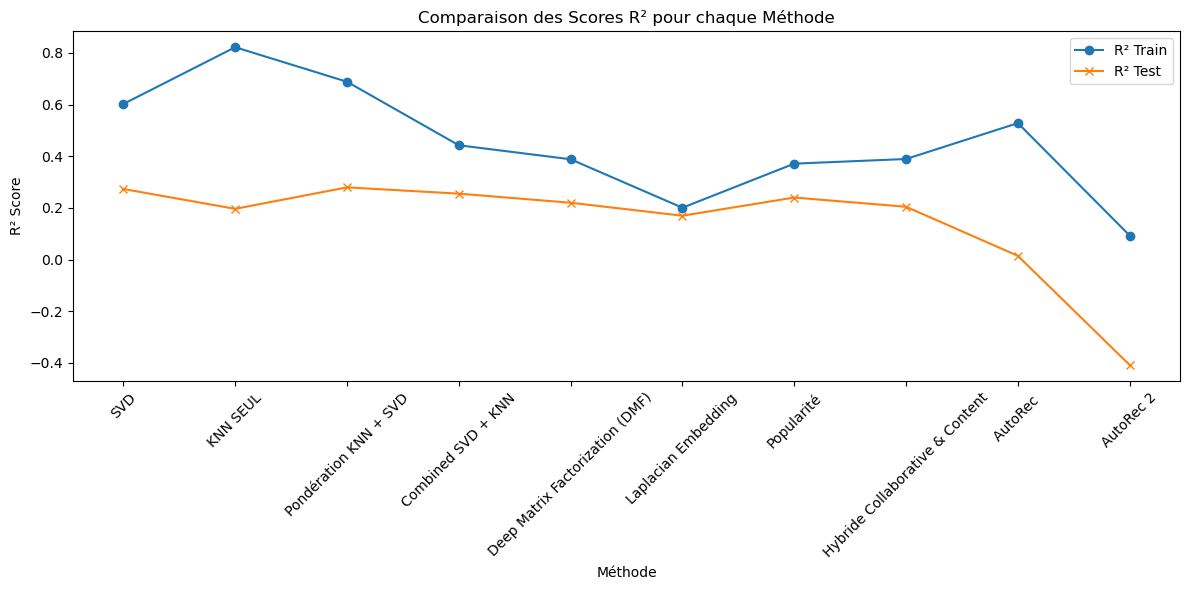

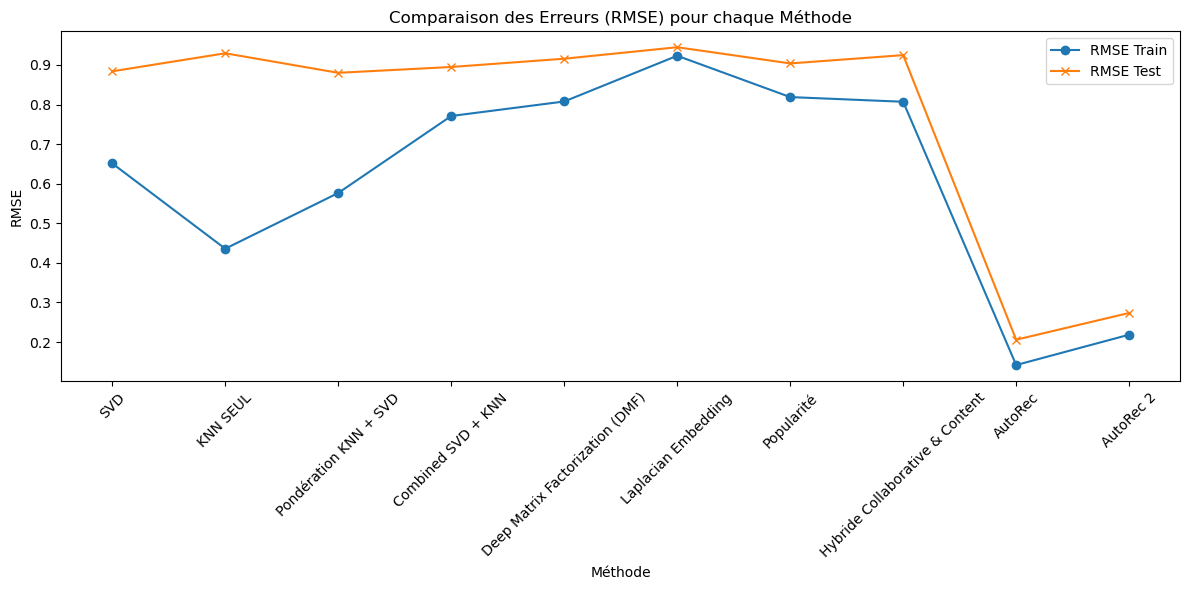

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# Données pour R² et RMSE
# Exemple : Charger les données R² dans un DataFrame
df_r2 = pd.DataFrame([
    {"Méthode": "SVD", "R² Train": r2_with_mask_train_svd, "R² Test": r2_with_mask_test_svd},
    {"Méthode": "KNN SEUL", "R² Train": r2_train_knn_seul, "R² Test": r2_test_knn_seul},
    {"Méthode": "Pondération KNN + SVD", "R² Train": r2_train_pond_knn_svd, "R² Test": r2_test_pond_knn_svd},
    {"Méthode": "Combined SVD + KNN", "R² Train": r2_train_combined_svd_knn, "R² Test": r2_test_combined_svd_knn},
    {"Méthode": "Deep Matrix Factorization (DMF)", "R² Train": r2_train_dmf, "R² Test": r2_test_dmf},
    {"Méthode": "Laplacian Embedding", "R² Train": r2_train_laplacian, "R² Test": r2_test_laplacian},
    {"Méthode": "Popularité", "R² Train": r2_train_popularity, "R² Test": r2_test_popularity},
    {"Méthode": "Hybride Collaborative & Content", "R² Train": r2_train_hybrid, "R² Test": r2_test_hybrid},
        {"Méthode": "AutoRec ", "R² Train": r2_train_autorec, "R² Test": r2_test_autorec},
    {"Méthode": "AutoRec 2", "R² Train": r2_train_autorec2, "R² Test": r2_test_autorec2}
])

df_rmse = pd.DataFrame([
    {"Méthode": "SVD", "RMSE Train": rmse_with_mask_train_svd, "RMSE Test": rmse_with_mask_test_svd},
    {"Méthode": "KNN SEUL", "RMSE Train": rmse_train_knn_seul, "RMSE Test": rmse_test_knn_seul},
    {"Méthode": "Pondération KNN + SVD", "RMSE Train": rmse_train_pond_knn_svd, "RMSE Test": rmse_test_pond_knn_svd},
    {"Méthode": "Combined SVD + KNN", "RMSE Train": rmse_train_combined_svd_knn, "RMSE Test": rmse_test_combined_svd_knn},
    {"Méthode": "Deep Matrix Factorization (DMF)", "RMSE Train": rmse_train_dmf, "RMSE Test": rmse_test_dmf},
    {"Méthode": "Laplacian Embedding", "RMSE Train": rmse_train_laplacian, "RMSE Test": rmse_test_laplacian},
    {"Méthode": "Popularité", "RMSE Train": rmse_train_popularity, "RMSE Test": rmse_test_popularity},
    {"Méthode": "Hybride Collaborative & Content", "RMSE Train": rmse_train_hybrid, "RMSE Test": rmse_test_hybrid},
    {"Méthode": "AutoRec", "RMSE Train": rmse_train_autorec, "RMSE Test": rmse_test_autorec},
    {"Méthode": "AutoRec 2", "RMSE Train": rmse_train_autorec2, "RMSE Test": rmse_test_autorec2}
])

# Tracer le R² pour chaque méthode
plt.figure(figsize=(12, 6))
plt.plot(df_r2["Méthode"], df_r2["R² Train"], marker='o', label="R² Train")
plt.plot(df_r2["Méthode"], df_r2["R² Test"], marker='x', label="R² Test")
plt.xlabel("Méthode")
plt.ylabel("R² Score")
plt.title("Comparaison des Scores R² pour chaque Méthode")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Tracer le RMSE pour chaque méthode
plt.figure(figsize=(12, 6))
plt.plot(df_rmse["Méthode"], df_rmse["RMSE Train"], marker='o', label="RMSE Train")
plt.plot(df_rmse["Méthode"], df_rmse["RMSE Test"], marker='x', label="RMSE Test")
plt.xlabel("Méthode")
plt.ylabel("RMSE")
plt.title("Comparaison des Erreurs (RMSE) pour chaque Méthode")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


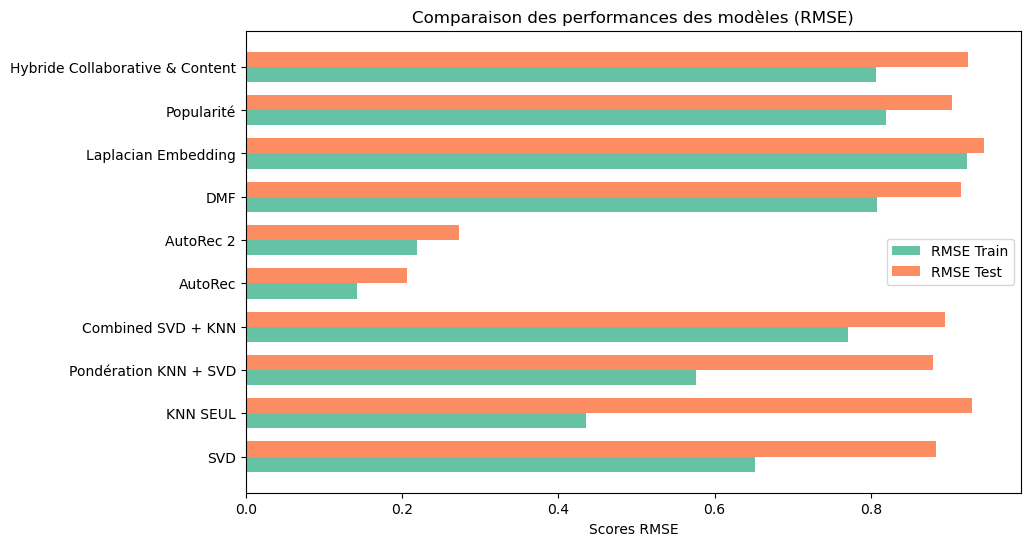

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des méthodes pour l'affichage
methods = ["SVD", "KNN SEUL", "Pondération KNN + SVD", "Combined SVD + KNN", 
           "AutoRec", "AutoRec 2","DMF", "Laplacian Embedding", "Popularité", "Hybride Collaborative & Content"]

# RMSE Train et Test (ajuster les valeurs pour que les longueurs soient égales)
rmse_train = [rmse_with_mask_train_svd, rmse_train_knn_seul, rmse_train_pond_knn_svd, rmse_train_combined_svd_knn, 
              rmse_train_autorec, rmse_train_autorec2, rmse_train_dmf, rmse_train_laplacian, rmse_train_popularity, rmse_train_hybrid]
rmse_test = [rmse_with_mask_test_svd, rmse_test_knn_seul, rmse_test_pond_knn_svd, rmse_test_combined_svd_knn, 
             rmse_test_autorec, rmse_test_autorec2, rmse_test_dmf, rmse_test_laplacian, rmse_test_popularity, rmse_test_hybrid]

# Création de la figure pour RMSE
fig, ax = plt.subplots(figsize=(10, 6))

# Largeur des barres
bar_width = 0.35

# Position des barres sur l'axe des y
index = np.arange(len(methods))

# Création des barres pour RMSE Train et Test
bar1 = ax.barh(index - bar_width/2, rmse_train, bar_width, label="RMSE Train", color="#66c2a5")
bar2 = ax.barh(index + bar_width/2, rmse_test, bar_width, label="RMSE Test", color="#fc8d62")

# Ajout des labels et du titre
ax.set_xlabel("Scores RMSE")
ax.set_title("Comparaison des performances des modèles (RMSE)")
ax.set_yticks(index)
ax.set_yticklabels(methods)

# Affichage de la légende
ax.legend()

# Affichage du graphique
plt.show()


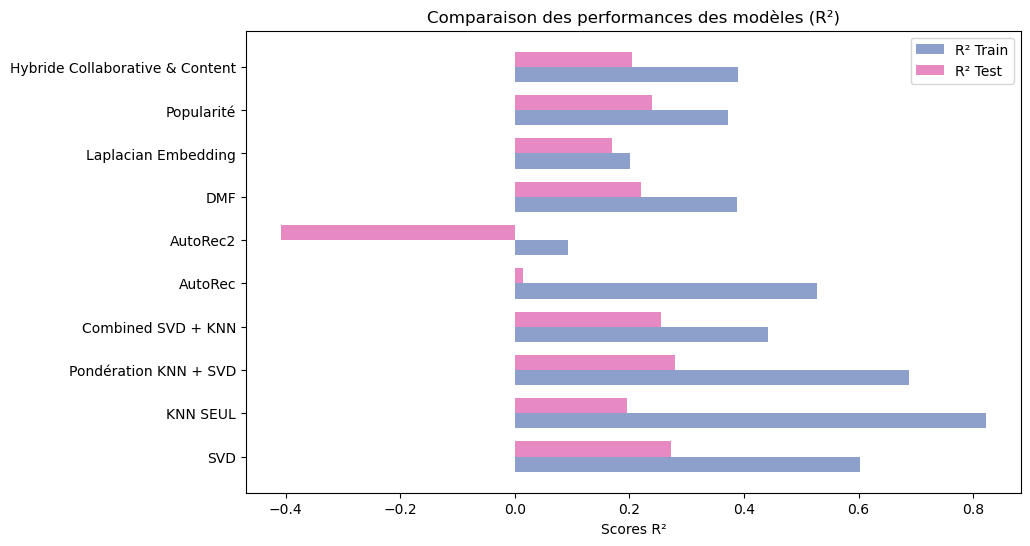

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des méthodes pour l'affichage
methods = ["SVD", "KNN SEUL", "Pondération KNN + SVD", "Combined SVD + KNN", 
           "AutoRec", "AutoRec2","DMF", "Laplacian Embedding", "Popularité", "Hybride Collaborative & Content"]

# R² Train et Test
r2_train = [r2_with_mask_train_svd, r2_train_knn_seul, r2_train_pond_knn_svd, r2_train_combined_svd_knn, 
            r2_train_autorec,r2_train_autorec2, r2_train_dmf, r2_train_laplacian, r2_train_popularity, r2_train_hybrid]
r2_test = [r2_with_mask_test_svd, r2_test_knn_seul, r2_test_pond_knn_svd, r2_test_combined_svd_knn, 
           r2_test_autorec, r2_test_autorec2, r2_test_dmf, r2_test_laplacian, r2_test_popularity, r2_test_hybrid]

# Création de la figure pour R²
fig, ax = plt.subplots(figsize=(10, 6))

# Largeur des barres
bar_width = 0.35

# Position des barres sur l'axe des y
index = np.arange(len(methods))

# Création des barres pour R² Train et Test
bar1 = ax.barh(index - bar_width/2, r2_train, bar_width, label="R² Train", color="#8da0cb")
bar2 = ax.barh(index + bar_width/2, r2_test, bar_width, label="R² Test", color="#e78ac3")

# Ajout des labels et du titre
ax.set_xlabel("Scores R²")
ax.set_title("Comparaison des performances des modèles (R²)")
ax.set_yticks(index)
ax.set_yticklabels(methods)

# Affichage de la légende
ax.legend()

# Affichage du graphique
plt.show()
